In [ ]:
# ESTE ES EL QUE ENTREGAMOS

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
base2005= pd.read_stata("/content/Individual_t105 (1).dta")
base2005




ValueError: buffer is smaller than requested size

In [ ]:
base2025= pd.read_excel("/content/usu_individual_T125.xlsx")
base2025





,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V21_03_M,V22_01_M,V22_02_M,V22_03_M,P_DECCF,P_RDECCF,P_GDECCF,P_PDECCF,P_IDECCF,P_ADECCF
0,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,2,1,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
1,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,3,0,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
2,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,4,0,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
3,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,5,0,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
4,TQRMNOUPQHLOLOCDEFKID00851757,2025,1,1,1,1,43,S,4,1294,...,0,0,0,0,3.0,3.0,3.0,NaN,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45420,TQRMNOPWQHLMKUCDEGJBF00852927,2025,1,1,4,1,43,S,13,773,...,0,0,0,0,8.0,8.0,8.0,NaN,8.0,8.0
45421,TQRMNOPWQHLMKUCDEGJBF00852927,2025,1,1,5,0,43,S,13,773,...,0,0,0,0,8.0,8.0,8.0,NaN,8.0,8.0
45422,TQRMNOSSVHLMLMCDEGJBF00852929,2025,1,1,1,1,43,S,13,719,...,0,0,0,0,10.0,10.0,10.0,NaN,10.0,10.0
45423,TQRMNOSSXHLMLMCDEGJBF00858297,2025,1,2,1,1,43,S,13,519,...,0,0,0,0,10.0,10.0,10.0,NaN,10.0,10.0


In [ ]:
# 1) detectar la columna 'region' sin cambiar nombres
def find_region_col(df): #Recorre el nombre de las columnas del DataFrame
    for c in df.columns:
        if str(c).strip().lower() == "region":
            return c
    raise KeyError("No encuentro la columna 'region'.")

#A cada columna lo convierte a string, le saca espacios con el strip() y lo
# pasa a minuscula
# esta función busca cómo se llama exactamente la columna región en la tabla
# recorre todas las columnas utilizando el dor y a cada nombre lo pasa a minusula y
# le saca los espacios; si queda "region" devuelve ese nombre original c.

colR_2005 = find_region_col(base2005)
colR_2025 = find_region_col(base2025)

# esto guarda el nombre real de la columna region en cada base

# 2) máscara para GBA (01)
def mask_gba(df, col):
    s = df[col]
    return (
        pd.to_numeric(s, errors="coerce").eq(1) |
        s.astype(str).str.strip().str.zfill(2).eq("01") |
        s.astype(str).str.strip().str.lower().isin(["gran buenos aires","g.b.a","gba"])
    )
# Esta función devuelve True las filas que son de GBA y False e las que no
# si la región viene con un 1, 01 o con una palabra  la marca como GBA
# usamos el astype("string") para que no se rompa si hay numeros o NaN mezclados.


# 3) filtrar SIN tocar ninguna otra columna
base2005_gba = base2005.loc[mask_gba(base2005, colR_2005)].copy()
base2025_gba = base2025.loc[mask_gba(base2025, colR_2025)].copy()

# El .loc[mask] se queda con las filas True de arriba y hace una copia

# 4) verlas “como el original”, solo filtradas
base2005_gba.head()
base2025_gba.head()

base2005_gba.to_csv("base2005_gba.csv")
base2025_gba.to_csv("base2025_gba.csv")

In [ ]:
# Pasar a minúsculas todas las columnas
cols1_lower = set(col.lower() for col in base2025_gba.columns)
cols2_lower = set(col.lower() for col in base2005_gba.columns)

# Columnas en común (ignorando mayúsculas)
comunes = cols1_lower & cols2_lower

# Columnas que están solo en cada DF
solo_df1 = cols1_lower - cols2_lower
solo_df2 = cols2_lower - cols1_lower

print("Columnas en ambas bases (ignorando mayúsculas):", comunes)
print("Solo en df1:", solo_df1)
print("Solo en df2:", solo_df2)


# veo las columnas que tienen en común las dos bases

Columnas en ambas bases (ignorando mayúsculas): {'pp02i', 'pp11g_mes', 'mas_500', 'adecifr', 'v8_m', 'pp04b3_ano', 'pp09c_esp', 'gdecifr', 'cat_inac', 'pp02c8', 'pp3f_tot', 'v9_m', 'pp04g', 'ch11', 'gdeccfr', 'ch07', 'pp05b2_ano', 'pp05e', 'pp11t', 'pp05c_1', 'pp06e', 'estado', 'pp08f2', 'pp04c99', 'pp07a', 'pp11a', 'pp11b2_dia', 'pp08j1', 'ch10', 'ch15_cod', 'pp08d4', 'pp07f2', 'pp09a_esp', 'pp10a', 'pp06h', 'pp03j', 'pp11c99', 'pp07k', 'pp09b', 'pdeccfr', 'h15', 'pp11n', 'pp08j2', 'ch16_cod', 'region', 'pp07c', 'pp11s', 'pp02c3', 'pp07e', 'pdecindr', 'pp11b2_mes', 'ano4', 'pondera', 'decocur', 'v12_m', 'pp07g3', 'pp11l', 'pp03i', 'pp07g4', 'pp11r', 'rdecindr', 'itf', 'pp04b3_mes', 'gdecindr', 'intensi', 'v18_m', 'pp09a', 'pp11g_dia', 'pp02c7', 'pp05h', 'ch13', 'gdecocur', 'pp07i', 'pp07h', 'v4_m', 'idecindr', 'pp08f1', 'pp06c', 'pdecifr', 'pp04b1', 'trimestre', 'pp11b2_ano', 'nro_hogar', 'ipcf', 'pp04b2', 'ch03', 'pp04a', 'pp07g2', 'pp02e', 'pp09c', 'v19_am', 'v3_m', 'pp02c1', 'pp11p

In [ ]:
# 1) Ver columnas en cada base
print("Columnas base2005:", base2005_gba.columns.tolist())
print("Columnas base2025:", base2025_gba.columns.tolist())

# 2) Unificar nombres de columnas (pasar todo a minúscula)
base2005_gba.columns = base2005_gba.columns.str.lower()
base2025_gba.columns = base2025_gba.columns.str.lower()

# 3) Asegurar que tengan las mismas columnas (intersección)
comunes = base2005_gba.columns.intersection(base2025_gba.columns)

base2005_gba = base2005_gba[comunes]
base2025_gba = base2025_gba[comunes]

# 4) Concatenar
base_gba1 = pd.concat([base2005_gba, base2025_gba], ignore_index=True)

# 5) Revisar resultado
print("Shape final:", base_gba1.shape)
base_gba1.to_csv("base_gba1.csv")
base_gba1.head(15000)





#Primero podés ver las columnas de cada DataFrame
#Después los nombres se estandarizan (todo en minúsculas).
#Se quedan únicamente con las columnas comunes.
#Finalmente, se concatenan en base_gba1.
# con el head 15000 veo si se concatenaron bien.




Columnas base2005: ['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'p

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,gdecifr,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr
0,125098,1.0,1.0,Sí,2005.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1017.0,...,03,,02,583.0,08,,07,08,,05
1,125188,1.0,1.0,Sí,2005.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1062.0,...,02,,02,150.0,02,,02,02,,01
2,125188,1.0,2.0,Sí,2005.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1062.0,...,02,,02,150.0,02,,02,02,,01
3,125188,1.0,3.0,0.0,2005.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1062.0,...,02,,02,150.0,02,,02,02,,01
4,125242,1.0,1.0,Sí,2005.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1103.0,...,05,,03,855.0,09,,09,09,,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,TQRMNOUQVHJNNRCDEIIAD00881622,1.0,2,1,2025.0,1,1,S,32,2419.0,...,12.0,NaN,12,0.0,12,NaN,12,12.0,NaN,12
14996,TQRMNOQRVHMLNUCDEIIAD00881623,1.0,1,1,2025.0,1,1,S,32,75.0,...,6.0,NaN,5,745000.0,8,NaN,7,7.0,NaN,5
14997,TQRMNOQRVHMLNUCDEIIAD00881623,1.0,2,1,2025.0,1,1,S,32,75.0,...,6.0,NaN,5,745000.0,8,NaN,7,7.0,NaN,5
14998,TQRMNOSRQHMMMUCDEIJAH00881672,1.0,1,1,2025.0,1,1,S,33,1129.0,...,2.0,NaN,2,191000.0,2,NaN,2,2.0,NaN,2


In [ ]:

import numpy as np

# Partimos de la base fuente
base_gba1_clean1 = base_gba1.copy()

# Pasamos todos los datos usando la misma referencia (2025)

base_gba1_clean1["region"] = base_gba1_clean1["region"].replace({"Gran Buenos Aires": 1})
base_gba1_clean1["aglomerado"] = base_gba1_clean1["aglomerado"].replace({

    "Gran La Plata": 2,
    "Bahía Blanca - Cerri": 3,
    "Gran Rosario": 4,
    "Gran Santa Fe": 5,
    "Gran Paraná": 6,
    "Posadas": 7,
    "Gran Resistencia": 8,
    "Cdro. Rivadavia – Rada Tilly": 9,
    "Gran Mendoza": 10,
    "Corrientes": 12,
    "Gran Córdoba": 13,
    "Concordia": 14,
    "Formosa": 15,
    "Neuquén – Plottier": 17,
    "Santiago del Estero - La Banda": 18,
    "Jujuy - Palpalá": 19,
    "Río Gallegos": 20,
    "Gran Catamarca": 22,
    "Salta": 23,
    "La Rioja": 25,
    "San Luis - El Chorrillo": 26,
    "Gran San Juan": 27,
    "Gran Tucumán - Tafí Viejo": 29,
    "Santa Rosa - Toay": 30,
    "Ushuaia - Río Grande": 31,
    "Ciudad de Buenos Aires": 32,
    "Partidos del GBA": 33,
    "Mar del Plata - Batán": 34,
    "Río Cuarto": 36
})
base_gba1_clean1['ch04'] =  base_gba1_clean1['ch04'].replace({'Varón': 1, 'Mujer': 2})

base_gba1_clean1['ch07'] =  base_gba1_clean1['ch07'].replace({'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5})

base_gba1_clean1['ch08'] =  base_gba1_clean1['ch08'].replace({'Obra social (incluye PAMI)': 1, 'Mutual/Prepaga/Servicio de emergencia': 2, 'Planes y seguros públicos': 3, 'No paga ni le descuentan': 4, 'Ns./Nr.': 9,'Obra social y mutual/prepaga/servicio de emergencia': 12, 'Obra social y planes y seguros públicos': 13, 'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23, 'Obra social, mutual/prepaga/servicio de emergencia y planes': 123})

base_gba1_clean1['nivel_ed'] =  base_gba1_clean1['nivel_ed'].replace({'Primaria Incompleta (incluye educación especial)': 1, 'Primaria Completa': 2, 'Secundaria Incompleta': 3, 'Secundaria Completa': 4, 'Superior Universitaria Incompleta': 5, 'Superior Universitaria Completa':6, 'Sin instrucción': 7, 'Ns./Nr.':9})

base_gba1_clean1['estado'] =  base_gba1_clean1['estado'].replace({'Entrevista individual no realizada (no respuesta al cuestion': 0, 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años':4})

base_gba1_clean1['cat_inac'] =  base_gba1_clean1['cat_inac'].replace({'Jubilado/pensionado': 1, 'Rentista': 2, 'Estudiante': 3,'Ama de casa': 4, 'Menor de 6 años': 5, 'Discapacitado': 6, 'Otros':7})

base_gba1_clean1['cat_ocup'] =  base_gba1_clean1['cat_ocup'].replace({'Patrón': 1, 'Cuenta propia': 2, 'Obrero o empleado': 3, 'Trabajador familiar sin remuneración': 4, 'Ns/Nr': 9})

base_gba1_clean1["ch03"] =  base_gba1_clean1["ch03"].replace({
    "Jefe": 1,
    "Cónyuge/Pareja": 2,
    "Hijo/Hijastro": 3,
    "Yerno/Nuera": 4,
    "Nieto": 5,
    "Madre/Padre": 6,
    "Suegro": 7,
    "Hermano": 8,
    "Otros familiares": 9,
    "No familiares": 10
})

base_gba1_clean1['ch06'] =  base_gba1_clean1['ch06'].replace({'Menos de 1 año': 0})

base_gba1_clean1['ch09'] =  base_gba1_clean1['ch09'].replace({
    'Sí': 1,
    'No': 2,
    'Menor de 2 años': 3
})

base_gba1_clean1['ch10'] =  base_gba1_clean1['ch10'].replace({
    'Sí, asiste': 1,
    'No asiste, pero asistió': 2,
    'Nunca asistió': 3
})

base_gba1_clean1['ch11'] =  base_gba1_clean1['ch11'].replace({
    'Público': 1,
    'Privado': 2,
    'Ns/Nr': 9
})
base_gba1_clean1['ch12'] =  base_gba1_clean1['ch12'].replace({
    'Jardín/Preescolar': 1,
    'Primario': 2,
    'EGB': 3,
    'Secundario': 4,
    'Polimodal': 5,
    'Terciario': 6,
    'Universitario': 7,
    'Posgrado Universitario': 8,
    'Educación especial (discapacitado)': 9
})

base_gba1_clean1['ch14'] =  base_gba1_clean1['ch14'].replace({
    'Ninguno': 0,
    'Primero': 1,
    'Segundo': 2,
    'Tercero': 3,
    'Cuarto': 4,
    'Quinto': 5,
    'Sexto': 6,
    'Séptimo': 7,
    'Octavo': 8,
    'Noveno': 9,
    'Educación especial': 98,
    'Ns/Nr': 99
})

base_gba1_clean1['ch15'] =  base_gba1_clean1['ch15'].replace({
    'En esta localidad': 1,
    'En otra localidad': 2,
    'En otra provincia (especificar)': 3,
    'En un país limítrofe': 4,
    'En otro país': 5,
    'Ns/Nr': 9
})

base_gba1_clean1['ch16'] =  base_gba1_clean1['ch16'].replace({
    'En esta localidad': 1,
    'En otra localidad de esta provincia': 2,
    'En otra provincia (especificar)': 3,
    'En un país limítrofe': 4,
    'En otro país': 5,
    'No había nacido': 6,
    'Ns/Nr': 9
})

base_gba1_clean1['nivel_ed'] =  base_gba1_clean1['nivel_ed'].replace({
    'Primario incompleto (incluye educación especial)': 1,
    'Primario completo': 2,
    'Secundario incompleto': 3,
    'Secundario completo': 4,
    'Superior y universitario incompleto': 5,
    'Superior y universitario completo': 6,
    'Sin instrucción': 7,
    'Ns/Nr': 9
})

base_gba1_clean1['intensi'] =  base_gba1_clean1['intensi'].replace({
    'Subocupación horaria Demandante': 1,
    "Subocupación horaria No Demandante": 1,
    'Ocupación plena': 2,
    'Sobreocupación horaria': 3,
    'Subocupación horaria No Demandante': 3,
    'Ocupado que no trabajó en la semana': 4,
    'Ns/Nr': 9
})

base_gba1_clean1['pp02e'] =  base_gba1_clean1['pp02e'].replace({
    'Está suspendido': 1,
    'Ya tiene trabajo asegurado': 2,
    'Se cansó de buscar trabajo': 3,
    'Hay poco trabajo en esta época del año': 4,
    'Por otras razones': 5
})

base_gba1_clean1['pp03c'] =  base_gba1_clean1['pp03c'].replace({
    '...un sólo empleo/ocupación/actividad?': 1,
    '...más de un empleo/ocupación/actividad?': 2
})

base_gba1_clean1['pp03h'] =  base_gba1_clean1['pp03h'].replace({
    '...podía trabajarlas esa semana?': 1,
    '...podía empezar a trabajarlas en dos semanas a más tardar?': 2,
    '...no podía trabajar más horas?': 3,
    'Ns/Nr': 9
})

base_gba1_clean1['pp04a'] =  base_gba1_clean1['pp04a'].replace({
    '...estatal?': 1,
    '...privada?': 2,
    '...de otro tipo? (especificar)': 3
})

base_gba1_clean1["pp04b1"] =  base_gba1_clean1["pp04b1"].replace({
    "Casa de familia": 1
})

base_gba1_clean1['pp04c'] =  base_gba1_clean1['pp04c'].replace({
    '1 persona': 1,
    '2 personas': 2,
    '3 personas': 3,
    '4 personas': 4,
    '5 personas': 5,
    'de 6 a 10 personas': 6,
    'de 11 a 25 personas': 7,
    'de 26 a 40 personas': 8,
    'de 41 a 100 personas': 9,
    'de 101 a 200 personas': 10,
    'de 201 a 500 personas': 11,
    'más de 500 personas': 12,
    'Ns/Nr': 99
})

base_gba1_clean1['pp04c99'] =  base_gba1_clean1['pp04c99'].replace({
    'Hasta 5': 1,
    'De 6 a 40': 2,
    'Más de 40': 3,
    'Ns/Nr': 9
})

base_gba1_clean1['pp04g'] =  base_gba1_clean1['pp04g'].replace({
    'En un local/oficina/establecimiento/negocio/taller/chacra/fi': 11,
    'En esta vivienda': 12,
    'En una chacra/finca': 13,
    'En puesto o kiosco fijo callejero': 2,
    'En vehículos: bicicleta/moto/auto/barco/bote (no incluye ser': 3,
    'En vehículo para transporte de personas y mercaderías-aéreo,': 4,
    'En obras en construcción, de infraestructura, minería o simi': 5,
    'En esta vivienda (sin lugar exclusivo)': 6,
    'En la vivienda del socio o del patrón': 7,
    'En el domicilio/local de los clientes': 8,
    'En la calle/espacios públicos/ambulante/de casa en casa/pues': 9,
    'En otro lugar': 10
})

base_gba1_clean1['pp05c_1'] =  base_gba1_clean1['pp05c_1'].replace({
    'Propio (del negocio)': 1,
    'Prestado/alquilado': 2,
    'No tiene': 3
})

base_gba1_clean1['pp05c_2'] =  base_gba1_clean1['pp05c_2'].replace({
    'Propio (del negocio)': 1,
    'Prestado/alquilado': 2,
    'No tiene': 3
})

base_gba1_clean1['pp05c_3'] =  base_gba1_clean1['pp05c_3'].replace({
    'Propio (del negocio)': 1,
    'Prestado/alquilado': 2,
    'No tiene': 3
})

base_gba1_clean1['pp05f'] =  base_gba1_clean1['pp05f'].replace({
    'Un solo cliente? (persona, empresa)': 6,
    'Distintos clientes? (incluye público en general)': 7
})

base_gba1_clean1['pp05h'] =  base_gba1_clean1['pp05h'].replace({
    'Menos de un mes': 1,
    'De 1 a 3 meses': 2,
    'Más de 3 a 6 meses': 3,
    'Más de 6 meses a 1 año': 4,
    'Más de 1 a 5 años': 5,
    'Más de 5 años': 6,
    'Ns/Nr': 9
})

base_gba1_clean1['pp06e'] =  base_gba1_clean1['pp06e'].replace({
    'Es una sociedad jurídicamente constituida? (S.A., S.R.L., Co': 1,
    'Es una sociedad de otra forma legal?': 2,
    'O es una sociedad convenida de palabra?': 3
})

base_gba1_clean1['pp07a'] =  base_gba1_clean1['pp07a'].replace({
    'Menos de un mes': 1,
    '1 a 3 meses': 2,
    'Más de 3 a 6 meses': 3,
    'Más de 6 a 12 meses': 4,
    'Más de 1 a 5 años': 5,
    'Más de 5 años': 6,
    'Ns/Nr': 9
})

base_gba1_clean1['pp07c'] =  base_gba1_clean1['pp07c'].replace({
    'Sí (incluye changa, trabajo transitorio, por tarea u obra, s': 1,
    'No (Incluye permanente, fijo, estable, de planta)': 2,
    'Ns/Nr': 9
})

base_gba1_clean1['pp07d'] =  base_gba1_clean1['pp07d'].replace({
    'Sólo fue esa vez/sólo cuando lo llaman': 1,
    'Hasta 3 meses': 2,
    'Más de 3 a 6 meses': 3,
    'Más de 6 a 12 meses': 4,
    'Más de 1 año': 5,
    'Ns/Nr': 9
})

base_gba1_clean1['pp07e'] =  base_gba1_clean1['pp07e'].replace({
    '...un período de prueba?': 2,
    '...una beca/pasantía/aprendizaje?': 3,
    '...un plan de empleo?': 5,
    'Ninguno de estos': 4
})

base_gba1_clean1['pp07j'] =  base_gba1_clean1['pp07j'].replace({
    '...de día? (mañana/tarde)': 1,
    '...de noche': 2,
    '...de otro tipo? (rotativo, día y noche, guardias con franco': 3
})

base_gba1_clean1['pp07k'] =  base_gba1_clean1['pp07k'].replace({
    '...le dan recibo con sello/membrete/firma del empleador?': 1,
    '...le dan un papel/recibo sin nada?': 2,
    '...entrega una factura?': 3,
    '...no le dan ni entrega nada?': 4,
    'no cobra, es trabajador sin pago, ad-honorem': 5
})

base_gba1_clean1["pp09a"] =  base_gba1_clean1["pp09a"].replace({
    "Ciudad de Buenos Aires": 1,
    "Partidos del GBA": 2,
    "Ambos": 3,
    "En otro lugar": 4
})
base_gba1_clean1["pp09c"] =  base_gba1_clean1["pp09c"].replace({
    "En otro lugar de esta provincia": 1,
    "En otra provincia": 2,
    "en otro país": 3
})

base_gba1_clean1["pp10a"] =  base_gba1_clean1["pp10a"].replace({
    "...menos de 1 mes?": 1,
    "...de 1 a 3 meses?": 2,
    "...más de 3 a 6 meses?": 3,
    "...más de 6 a 12 meses?": 4,
    "...más de 1 año?": 5
})

base_gba1_clean1["pp10e"] =  base_gba1_clean1["pp10e"].replace({
    "...menos de 1 mes?": 1,
    "...de 1 a 3 meses?": 2,
    "...más de 3 a 6 meses?": 3,
    "...más de 6 a 12 meses?": 4,
    "...más de 1 a 3 años?": 5,
    "...más de 3 años?": 6
})

base_gba1_clean1["pp11a"] =  base_gba1_clean1["pp11a"].replace({
    "...estatal?": 1,
    "...privada?": 2,
    "...de otro tipo?": 3
})

base_gba1_clean1['pp11b1'] =  base_gba1_clean1['pp11b1'].replace({ "Casa de familia": 1})

base_gba1_clean1["pp11c"] =  base_gba1_clean1["pp11c"].replace({
    "1 persona": 1,
    "2 personas": 2,
    "3 personas": 3,
    "4 personas": 4,
    "5 personas": 5,
    "de 6 a 10 personas": 6,
    "de 11 a 25 personas": 7,
    "de 26 a 40 personas": 8,
    "de 41 a 100 personas": 9,
    "de 101 a 200 personas": 10,
    "de 201 a 500 personas": 11,
    "más de 500 personas": 12,
    "Ns/Nr": 99
})

base_gba1_clean1["pp11c99"] =  base_gba1_clean1["pp11c99"].replace({
    "Hasta 5": 1,
    "De 6 a 40": 2,
    "Más de 40": 3,
    "Ns/Nr": 9
})

base_gba1_clean1["pp11l"] =  base_gba1_clean1["pp11l"].replace({
    "Falta de clientes/clientes que no pagan": 1,
    "Falta de capital/equipamiento": 2,
    "Trabajo estacional": 3,
    "Tenía gastos demasiado altos": 4,
    "Otras causas laborales (especificar)": 5,
    "Jubilación/retiro": 6,
    "Causas personales (matrimonio, embarazo, cuidado de hijos o": 7
})

base_gba1_clean1["pp11m"] =  base_gba1_clean1["pp11m"].replace({
    "...un plan de empleo?": 1,
    "...un período de prueba?": 2,
    "...otro tipo de trabajo?": 3
})

base_gba1_clean1["pp11o"] =  base_gba1_clean1["pp11o"].replace({
    "Despido/cierre": 1,
    "Por retiro voluntario del sector público": 2,
    "Por jubilación": 3,
    "Fin del trabajo temporario/estacional": 4,
    "Le pagaban poco/no le pagaban": 5,
    "Malas relaciones laborales/malas condiciones de trabajo (ins": 6,
    "Renuncia obligada/pactada": 7,
    "Otras causas laborales": 8,
    "Por razones personales": 9
})

base_gba1_clean1['componente'] =  base_gba1_clean1['componente'].replace({"Servicio doméstico en hogares": 51})
base_gba1_clean1['trimestre'] =  base_gba1_clean1['trimestre'].replace({"1er. Trimestre": 1})
base_gba1_clean1 =  base_gba1_clean1.replace({"Ns/Nr": np.nan, "Ns./Nr": np.nan})
base_gba1_clean1 =  base_gba1_clean1.replace({"Sí": 1, "No": 2})

col = "itf"

# 1) Marcar textos de no respuesta como NaN
base_gba1_clean1[col] = base_gba1_clean1[col].replace({
    "Ns/Nr": np.nan, "Ns./Nr.": np.nan, "ns/nr": np.nan, "NS/NR": np.nan,
    "S/D": np.nan, "s/d": np.nan, "": np.nan
})

# 2) Si viniera como string con separadores, dejar sólo número
base_gba1_clean1[col] = (
    base_gba1_clean1[col].astype(str).str.strip()
    .str.replace(r"[^\d,.\-]", "", regex=True)  # saca $ espacios, etc.
    .str.replace(".", "", regex=False)          # quita miles
    .str.replace(",", ".", regex=False)         # coma -> punto decimal
)

# 3) Pasar a numérico
base_gba1_clean1[col] = pd.to_numeric(base_gba1_clean1[col], errors="coerce")


/tmp/ipython-input-938701301.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_gba1_clean1["region"] = base_gba1_clean1["region"].replace({"Gran Buenos Aires": 1})
/tmp/ipython-input-938701301.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_gba1_clean1["aglomerado"] = base_gba1_clean1["aglomerado"].replace({
/tmp/ipython-input-938701301.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy

In [ ]:
base_gba1_clean1.head(16000)


,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,gdecifr,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr
0,125098,1.0,1.0,1.0,2005.0,1,1,S,32,1017.0,...,03,,02,583.00,08,,07,08,,05
1,125188,1.0,1.0,1.0,2005.0,1,1,S,32,1062.0,...,02,,02,150.00,02,,02,02,,01
2,125188,1.0,2.0,1.0,2005.0,1,1,S,32,1062.0,...,02,,02,150.00,02,,02,02,,01
3,125188,1.0,3.0,0.0,2005.0,1,1,S,32,1062.0,...,02,,02,150.00,02,,02,02,,01
4,125242,1.0,1.0,1.0,2005.0,1,1,S,32,1103.0,...,05,,03,855.00,09,,09,09,,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,TQRMNOPRXHJMLPCDEIJAH00874231,1.0,2.0,1.0,2025.0,1,1,S,33,3076.0,...,2.0,NaN,3,101666.67,1,NaN,1,1.0,NaN,1
15996,TQRMNOPRXHJMLPCDEIJAH00874231,1.0,3.0,1.0,2025.0,1,1,S,33,3076.0,...,2.0,NaN,3,101666.67,1,NaN,1,1.0,NaN,1
15997,TQRMNOPRXHJMLPCDEIJAH00874231,1.0,4.0,0.0,2025.0,1,1,S,33,3076.0,...,2.0,NaN,3,101666.67,1,NaN,1,1.0,NaN,1
15998,TQRMNORSQHKNRUCDEIJAH00859217,1.0,1.0,1.0,2025.0,1,1,S,33,662.0,...,12.0,NaN,12,0.00,12,NaN,12,12.0,NaN,12


In [ ]:
df = base_gba1_clean1   # o la copia donde guardaste

dom = {
    "region": {1,40,41,42,43,44},
    "trimestre": {1,2,3,4},
    "mas_500": {0,1},
    "ch04": {1,2},
    "ch07": {1,2,3,4,5},
    "ch09": {1,2,3},
    "ch10": {1,2,3},
    "ch11": {1,2,9},
    "ch13": {1,2,9},
    "ch14": set(range(10)),
    "ch15": {1,2,3,4,5,9},
    "ch16": {1,2,3,4,5,6,9},
    "nivel_ed": {1,2,3,4,5,6,7,9},
    "estado": {0,1,2,3,4},
    "cat_ocup": {1,2,3,4,9},
    "cat_inac": {1,2,3,4,5,6,7},
}

todo_ok = True
for c, allowed in dom.items():
    if c in df.columns:
        bad = df[c].dropna().loc[~df[c].isin(allowed)]
        if bad.size:
            print(f"✗ {c}: {bad.size} fuera de dominio → {bad.unique()[:10]}")
            todo_ok = False
        else:
            print(f"✓ {c} OK")
print("✔ Normalizado" if todo_ok else "⚠️ Revisar columnas marcadas")



✓ region OK
✓ trimestre OK
✗ mas_500: 16665 fuera de dominio → ['S']
✓ ch04 OK
✗ ch07: 4 fuera de dominio → ['Ns./Nr.']
✗ ch09: 10 fuera de dominio → ['Ns./Nr.' 9]
✗ ch10: 375 fuera de dominio → [0.0 'Ns./Nr.' 9]
✗ ch11: 11726 fuera de dominio → [0.0 'Ns./Nr.']
✗ ch13: 751 fuera de dominio → [0.0 'Ns./Nr.']
✗ ch14: 9671 fuera de dominio → ['02' '  ' '05' '00' '01' '04' '03' '07' '99' '06']
✗ ch15: 12 fuera de dominio → ['Ns./Nr.']
✗ ch16: 7 fuera de dominio → ['Ns./Nr.']
✓ nivel_ed OK
✓ estado OK
✗ cat_ocup: 8641 fuera de dominio → [0.]
✗ cat_inac: 8321 fuera de dominio → [0.]
⚠️ Revisar columnas marcadas


In [ ]:
# === Punto 5 del tp1 que nos sirve ===

# 1) ¿Cuántas personas no respondieron condición de actividad?
no_estado = base_gba1_clean1['estado'].isna().sum()
print("=== Condición de actividad ===")
print(f"Personas que NO respondieron condición de actividad: {no_estado}\n")

# 2) Bases según ITF
respondieron   = base_gba1_clean1[base_gba1_clean1['itf'] > 0].copy()
norespondieron = base_gba1_clean1[base_gba1_clean1['itf'] == 0].copy()

# 3) Resumen por año
resumen = (
    base_gba1_clean1
      .assign(respuesta_ITF = base_gba1_clean1['itf'].apply(lambda x: 1 if x>0 else (0 if x==0 else -1)))
      .groupby('ch04')
      .agg(
          respondieron   = ('respuesta_ITF', lambda x: (x==1).sum()),
          no_respondieron= ('respuesta_ITF', lambda x: (x==0).sum()),
          otros          = ('respuesta_ITF', lambda x: (x==-1).sum()),
          total          = ('respuesta_ITF', 'count')
      )
      .reset_index()
)

resumen['% respondieron']    = (resumen['respondieron']/resumen['total']*100).round(2)
resumen['% no_respondieron'] = (resumen['no_respondieron']/resumen['total']*100).round(2)

# Agregar fila TOTAL
fila_total = pd.DataFrame({
    'ch04':['TOTAL'],
    'respondieron':[resumen['respondieron'].sum()],
    'no_respondieron':[resumen['no_respondieron'].sum()],
    'otros':[resumen['otros'].sum()],
    'total':[resumen['total'].sum()],
    '% respondieron':[ (resumen['respondieron'].sum()/resumen['total'].sum()*100).round(2) ],
    '% no_respondieron':[ (resumen['no_respondieron'].sum()/resumen['total'].sum()*100).round(2) ]
})
resumen = pd.concat([resumen, fila_total], ignore_index=True)

print("=== Resumen por año – ITF (criterio: >0 / =0) ===")
print(resumen.to_string(index=False))

# 4) Tabla de contingencia año × respuesta_ITF
contingencia = (
    base_gba1_clean1
      .assign(respuesta_ITF = base_gba1_clean1['itf'].apply(lambda x: "Respondió (>0)" if x>0 else ("No respondió (=0)" if x==0 else "Otros")))
      .pivot_table(index='respuesta_ITF', columns='ch04', aggfunc='size', fill_value=0)
)

print("\n=== Contingencia año × respuesta – ITF ===")
print(contingencia)

respondieron.to_csv("respondieron.csv", index=False) #creo los data frames nuevos
norespondieron.to_csv("norespondieron.csv", index=False) #creo los data frames nuevos




=== Condición de actividad ===
Personas que NO respondieron condición de actividad: 0

=== Resumen por año – ITF (criterio: >0 / =0) ===
 ch04  respondieron  no_respondieron  otros  total  % respondieron  % no_respondieron
    1          6505             1438      0   7943           81.90              18.10
    2          7175             1547      0   8722           82.26              17.74
TOTAL         13680             2985      0  16665           82.09              17.91

=== Contingencia año × respuesta – ITF ===
ch04                  1     2
respuesta_ITF                
No respondió (=0)  1438  1547
Respondió (>0)     6505  7175


In [ ]:
import numpy as np
import pandas as pd

df = respondieron.copy()

# Tipos
df['ano4'] = pd.to_numeric(df['ano4'], errors='coerce')
df['itf']  = pd.to_numeric(df['itf'],  errors='coerce')
df['ipcf'] = pd.to_numeric(df.get('ipcf'), errors='coerce')  # si no existe, quedará NaN

import numpy as np
import pandas as pd

# --- nivel educativo: ordenar de menor a mayor educación; Ns/Nr a NA ---
map_nivel_orden = {
    'Sin instrucción': 0,
    'Primaria Incompleta (incluye educación especial)': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Ns./Nr.': np.nan
}
if 'nivel_ed' in df.columns:
    df['nivel_ed_ord'] = df['nivel_ed'].replace(map_nivel_orden).astype('float')

# --- Dummy de condición laboral: 1=ocupado, 0=desocupado, NaN=otros (inactivo, <10, etc.) ---
df["estado_laboral"] = np.select(
    [df["estado"] == 1, df["estado"] == 2],
    [1, 0],
    default=np.nan
).astype("float64")

# --- Dummy de alfabetismo (sabe leer o escribir): 1=Sí, 0=No, NaN=Menor de 2 años/otros ---
df["alfabetismo"] = np.select(
    [df["ch09"] == 1, df["ch09"] == 2],
    [1, 0],
    default=np.nan
).astype("float64")

# Chequeo rápido
print("estado_laboral\n", df["estado_laboral"].value_counts(dropna=False))
print("alfabetismo\n", df["alfabetismo"].value_counts(dropna=False))


# CBT por adulto equivalente
cba_map = {2005: 205.07, 2025: 365_177.0}
df['cbt_adulto'] = df['ano4'].round().map(cba_map).astype(float)

# Estimar miembros del hogar (aprox) y usarlo como AE  ⬇️  (REEMPLAZA ESTE BLOQUE)
cond = (df['itf'] > 0) & (df['ipcf'] > 0)
miembros = np.where(cond, np.round((df['itf'] / df['ipcf']).clip(lower=1)), np.nan)

# OJO: envolver en Serie para poder usar Int64 (pandas)
df['miembros_est'] = pd.Series(miembros, index=df.index).astype('Int64')

df['cbt_hogar_est'] = df['cbt_adulto'] * df['miembros_est']

# Flag pobreza por CBT (1 si ITF < CBT del hogar)
mask_flag = df['itf'].notna() & df['cbt_hogar_est'].notna()
df['itf_bajo_cbt_hogar'] = pd.Series(
    np.where(mask_flag, df['itf'] < df['cbt_hogar_est'], np.nan),
    index=df.index
).astype('Int64')


# Flag pobreza por CBT (1 si ITF < CBT del hogar)
mask = df['itf'].notna() & df['cbt_hogar_est'].notna()
df['itf_bajo_cbt_hogar'] = pd.Series(np.where(mask, df['itf'] < df['cbt_hogar_est'], np.nan),
                                     index=df.index).astype('Int64')

# Vistazo y guardar
print(df.groupby(df['ano4'].round().astype('Int64'))['itf_bajo_cbt_hogar'].value_counts(dropna=False))
df.to_csv('respondieron_cbt_hogar_est.csv', index=False)

respondieron = df

respondieron.shape[1]
respondieron.columns


estado_laboral
 estado_laboral
NaN    7074
1.0    5799
0.0     807
Name: count, dtype: int64
alfabetismo
 alfabetismo
1.0    12443
0.0      900
NaN      337
Name: count, dtype: int64
ano4  itf_bajo_cbt_hogar
2005  0                     6070
      1                     3301
2025  0                     2519
      1                     1790
Name: count, dtype: Int64


Index(['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'gdeccfr', 'pdeccfr', 'adeccfr', 'nivel_ed_ord', 'estado_laboral',
       'alfabetismo', 'cbt_adulto', 'miembros_est', 'cbt_hogar_est',
       'itf_bajo_cbt_hogar'],
      dtype='object', length=175)

In [ ]:
import numpy as np
import pandas as pd

# --- Aseguro nombres en minúscula (ajusta si tus columnas ya están así)
respondieron.columns = respondieron.columns.str.lower()

# Coerción a numérico por si llegan como strings
for c in ["ch12","ch13","ch14"]:
    if c not in respondieron.columns:
        raise KeyError(f"Falta la columna {c} en respondieron")
    respondieron[c] = pd.to_numeric(respondieron[c], errors="coerce")

# --- Mapeo de niveles educativos (EPH-style, ajustable):
# ch12 = nivel más alto alcanzado
#   1: Sin instrucción
#   2: Primario
#   3: Secundario
#   4: Terciario / No universitario
#   5: Universitario (grado)
#   6: Posgrado
# ch13 = ¿finalizó ese nivel? 1: Sí, 2: No
# ch14 = último año aprobado dentro de ese nivel (1..máximo del nivel)

# Para cada nivel definimos:
#   - "offset": años acumulados antes de ese nivel
#   - "max_level_years": años máximos posibles dentro de ese nivel
offset_map = {
    1: 0,   # sin instrucción
    2: 0,   # primario
    3: 6,   # secundario
    4: 12,  # terciario/no univ
    5: 12,  # universitario
    6: 17,  # posgrado (asumiendo grado ~5 años → 12+5=17)
}
max_years_map = {
    1: 0,  # sin instrucción
    2: 6,  # primario (1-6)
    3: 6,  # secundario (1-6)
    4: 3,  # terciario/no univ (1-3)  ← ajustá a tu codificación si aplica
    5: 6,  # universitario (1-6)
    6: 3,  # posgrado (1-3)          ← ajustá si tu encuesta usa otra escala
}

lvl   = respondieron["ch12"]
fin   = respondieron["ch13"]
anio  = respondieron["ch14"]

offset          = lvl.map(offset_map)
max_level_years = lvl.map(max_years_map)

# Capo anio dentro del rango del nivel (si anio es NaN y no finalizó, quedará NaN)
anio_clip = anio.clip(lower=0)
anio_clip = np.where(pd.notna(max_level_years), np.minimum(anio_clip, max_level_years), np.nan)

# Si finalizó (=1): toma el máximo del nivel. Si NO finalizó (=2): toma 'anio' dentro del nivel.
# Otros códigos en ch13 → NaN (a propósito)
years_in_level = np.where(fin == 1, max_level_years,
                   np.where(fin == 2, anio_clip, np.nan))

# Años totales = offset + años dentro del nivel
educ = offset + years_in_level
educ = pd.to_numeric(educ, errors="coerce").astype("float64")

# Evito negativos o valores imposibles; trunco razonablemente a [0, 25]
educ = educ.clip(lower=0, upper=25)

# Agrego a la base
respondieron["educ"] = educ

# --- Estadística descriptiva solicitada
desc = respondieron["educ"].describe(percentiles=[0.5])[["mean","std","min","50%","max"]]
desc.index = ["promedio","sd","min","p50","max"]
print(desc)


promedio    10.687886
sd           5.637264
min          0.000000
p50         12.000000
max         20.000000
Name: educ, dtype: float64


In [ ]:
# CBT por adulto equivalente (la que ya tenías por año)
# cba_map = {2005: 205.07, 2025: 365_177.0}  # revisá que esté en mismas unidades que IPCF

respondieron['pobre'] = (
    (respondieron['ipcf'].astype(float) < respondieron['cbt_adulto'].astype(float))
).astype(int)

# chequeo
print(respondieron.groupby('ano4')['pobre'].value_counts(dropna=False))


ano4    pobre
2005.0  0        6070
        1        3301
2025.0  0        2519
        1        1790
Name: count, dtype: int64


In [ ]:
respondieron['pobre'] = (
    (respondieron['itf'].astype(float) < respondieron['cbt_hogar_est'].astype(float))
).astype(int)



In [ ]:
# TP 3 ARRANCA ACÁ

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# ==========
# 1) Partimos de tu df armado
# ==========
df = respondieron.copy()

# --- Asegurar tipos base ---
df['ano4'] = pd.to_numeric(df['ano4'], errors='coerce')
df['itf']  = pd.to_numeric(df['itf'],  errors='coerce')
df['ipcf'] = pd.to_numeric(df.get('ipcf'), errors='coerce')

# --- Asegurar tipos de tus variables nuevas ---
bin_cast = lambda s: pd.to_numeric(s, errors='coerce').fillna(0).astype(int)
if 'estado_laboral' in df.columns:
    df['estado_laboral'] = bin_cast(df['estado_laboral'])
if 'alfabetismo' in df.columns:
    df['alfabetismo']   = bin_cast(df['alfabetismo'])
if 'nivel_ed_ord' in df.columns:
    df['nivel_ed_ord']  = pd.to_numeric(df['nivel_ed_ord'], errors='coerce')


cba_map = {2005: 205.07, 2025: 365_177.0}
df['cbt_adulto'] = df['ano4'].round().map(cba_map).astype(float)

cond = (df['itf'] > 0) & (df['ipcf'] > 0)
miembros = np.where(cond, np.round((df['itf'] / df['ipcf']).clip(lower=1)), np.nan)
df['miembros_est']   = pd.Series(miembros, index=df.index).astype('Int64')
df['cbt_hogar_est']  = df['cbt_adulto'] * df['miembros_est']

mask = df['itf'].notna() & df['cbt_hogar_est'].notna()
df['itf_bajo_cbt_hogar'] = pd.Series(
    np.where(mask, df['itf'] < df['cbt_hogar_est'], np.nan),
    index=df.index
).astype('Int64')

# Variable dependiente 'pobre' (1/0)
df = df[df['itf_bajo_cbt_hogar'].notna()].copy()
df['pobre'] = df['itf_bajo_cbt_hogar'].astype(int)

# ==========
# 3) Split 70/30 por año con random_state=444
# ==========
cols_derivadas_itf = ['itf', 'ipcf', 'cbt_adulto', 'miembros_est', 'cbt_hogar_est', 'itf_bajo_cbt_hogar']
cols_a_excluir = ['pobre', 'ingreso'] + [c for c in cols_derivadas_itf if c in df.columns]

# Variables que DEBEN estar en X
vars_forzadas = ['nivel_ed_ord', 'estado_laboral', 'alfabetismo', "educ"]

bases_train = {}
bases_test  = {}

for año in sorted(df['ano4'].dropna().unique()):
    base_año = df[df['ano4'] == año].copy()
    y = base_año['pobre']

    # Armamos X sin fugas
    X_full = base_año.drop(columns=cols_a_excluir, errors='ignore')

    # Aseguramos que las forzadas existan en X
    for v in vars_forzadas:
        if v not in X_full.columns:
            X_full[v] = 0
            print(f"[Aviso] La variable '{v}' no estaba en el df del año {int(año)}; se creó como columna 0.")

    # Reordenamos para que las forzadas queden adelante (opcional)
    otras = [c for c in X_full.columns if c not in vars_forzadas]
    X_full = X_full[vars_forzadas + otras]

    # Intercepto explícito
    X_full.insert(0, 'intercept', 1)

    # Split 70/30
    X_train, X_test, y_train, y_test = train_test_split(
        X_full, y, test_size=0.30, random_state=444
    )

    bases_train[int(año)] = (X_train, y_train)
    bases_test[int(año)]  = (X_test, y_test)

# ==========
# 4) Chequeo resumido
# ==========
for año in bases_train:
    Xtr, ytr = bases_train[año]
    Xte, yte = bases_test[año]
    presentes_tr = all(v in Xtr.columns for v in vars_forzadas)
    presentes_te = all(v in Xte.columns for v in vars_forzadas)
    print(f"Año {año}: train={len(Xtr)} | test={len(Xte)} | cols_X={Xtr.shape[1]} | "
          f"forzadas en train={presentes_tr} / test={presentes_te}")




Año 2005: train=6559 | test=2812 | cols_X=171 | forzadas en train=True / test=True
Año 2025: train=3016 | test=1293 | cols_X=171 | forzadas en train=True / test=True


In [ ]:
# 1


from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# + ch09 agregado
vars_interes = ["ch04", "ch06", "estado_laboral", "nivel_ed_ord", "alfabetismo", "pp3e_tot"]
min_nonnull_rows = 50

bases_train, bases_test = {}, {}

def _map_text_cats_to_codes(s: pd.Series) -> pd.Series:
    if pd.api.types.is_numeric_dtype(s):
        return s
    cats = s.astype("string").str.strip().str.lower()
    cat_order = cats.value_counts(dropna=True).index.tolist()
    mapping = {cat: i+1 for i, cat in enumerate(cat_order)}  # 1..K
    return cats.map(mapping)

for año in sorted(df['ano4'].dropna().unique()):
    base_año = df.loc[df['ano4'] == año].copy()

    if "pobre" not in base_año.columns:
        print(f"[AVISO] Año {int(año)}: no existe 'pobre'. Salto.")
        continue
    y = base_año["pobre"].astype("Int64")

    presentes = [c for c in vars_interes if c in base_año.columns]
    if not presentes:
        print(f"[AVISO] Año {int(año)}: ninguna X de {vars_interes} está presente. Salto.")
        continue

    X = pd.DataFrame(index=base_año.index)
    for c in presentes:
        s = base_año[c]
        if pd.api.types.is_numeric_dtype(s):
            X[c] = pd.to_numeric(s, errors="coerce")
        else:
            s_num = pd.to_numeric(s, errors="coerce")
            if s_num.notna().mean() >= 0.5:
                X[c] = s_num
            else:
                X[c] = _map_text_cats_to_codes(s)

    nonnull_counts = X.notna().sum()
    cols_ok = nonnull_counts[nonnull_counts > 0].index.tolist()
    X = X[cols_ok]

    mask_ok = X.notna().all(axis=1) & y.notna()
    X = X.loc[mask_ok].copy()
    y = y.loc[mask_ok].astype(int)

    if len(X) < max(2, int(min_nonnull_rows)):
        print(f"[AVISO] Año {int(año)}: filas válidas en X={len(X)} (<{min_nonnull_rows}). Salto este año.")
        continue
    if y.nunique() < 2:
        print(f"[AVISO] Año {int(año)}: y tiene una sola clase. Salto este año.")
        continue

    X.insert(0, "intercept", 1.0)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=444
        # , stratify=y
    )
    bases_train[int(año)] = (X_train, y_train)
    bases_test[int(año)]  = (X_test, y_test)

    print(f"Año {int(año)}: OK | filas={len(X)} | cols_X={list(X.columns)}")

if not bases_train:
    print("⚠️ No se construyeron bases_train/bases_test (todas las particiones quedaron vacías).")
else:
    for a in bases_train:
        Xtr, ytr = bases_train[a]
        Xte, yte = bases_test[a]
        print(f"[Resumen] Año {a}: train={len(Xtr)} test={len(Xte)} cols={Xtr.shape[1]}")


Año 2005: OK | filas=9371 | cols_X=['intercept', 'ch04', 'ch06', 'estado_laboral', 'nivel_ed_ord', 'alfabetismo', 'pp3e_tot']
Año 2025: OK | filas=1923 | cols_X=['intercept', 'ch04', 'ch06', 'estado_laboral', 'nivel_ed_ord', 'alfabetismo', 'pp3e_tot']
[Resumen] Año 2005: train=6559 test=2812 cols=7
[Resumen] Año 2025: train=1346 test=577 cols=7


In [ ]:
# === Dif. de medias (Welch) + print en el formato de tu screenshot ===
from scipy import stats
import numpy as np
import pandas as pd

def diff_means_tablas(bases_train, bases_test, excluir=('intercept',), dec=4, ordenar='xorder'):
    """
    Devuelve {año: DataFrame} con columnas:
    variable, train_mean, test_mean, diff_mean, p_value, sig
    """
    tablas = {}
    for año in sorted(bases_train.keys()):
        Xtr, _ = bases_train[año]
        Xte, _ = bases_test[año]

        # columnas comparables (sin intercept ni otras a excluir)
        cols = [c for c in Xtr.columns if c in Xte.columns and c not in excluir]
        if ordenar == 'abc':
            cols = sorted(cols)

        rows = []
        for c in cols:
            a = pd.to_numeric(Xtr[c], errors='coerce')
            b = pd.to_numeric(Xte[c], errors='coerce')

            m_tr = a.mean()
            m_te = b.mean()
            diff = m_tr - m_te

            # Welch
            try:
                _, pval = stats.ttest_ind(a.values, b.values, equal_var=False, nan_policy='omit')
            except Exception:
                pval = np.nan

            if pd.isna(pval):
                sig = ''
            elif pval < 0.001:
                sig = '***'
            elif pval < 0.01:
                sig = '**'
            elif pval < 0.05:
                sig = '*'
            else:
                sig = ''

            rows.append({
                'variable'  : c,
                'train_mean': m_tr,
                'test_mean' : m_te,
                'diff_mean' : diff,
                'p_value'   : pval,
                'sig'       : sig
            })

        tab = pd.DataFrame(rows)
        # redondeo interno (para coherencia con tu ejemplo)
        for k in ['train_mean','test_mean','diff_mean','p_value']:
            tab[k] = tab[k].apply(lambda x: round(x, dec) if pd.notna(x) else x)
        tablas[año] = tab[['variable','train_mean','test_mean','diff_mean','p_value','sig']]
    return tablas

def _fmt_num(x, dec=4):
    # muestra "" para NaN y fija 4 decimales
    return "" if (x is None or (isinstance(x, float) and np.isnan(x))) else f"{x:.{dec}f}"

def imprimir_diff_means_formato(tablas_dm, dec=4):
    """
    Imprime exactamente como tu captura:
    === Diferencia de medias: 2025 (train vs test) ===
      variable  train_mean  test_mean  diff_mean  p_value  sig
    """
    # anchos para que cuadre lindo; ajusta si querés
    widths = {"variable": 16, "train_mean": 12, "test_mean": 11, "diff_mean": 11, "p_value": 9, "sig": 4}
    cols = ['variable','train_mean','test_mean','diff_mean','p_value','sig']

    for año in sorted(tablas_dm.keys()):
        print(f"\n=== Diferencia de medias: {año} (train vs test) ===")
        # header
        hdr = (
            f"{'variable'.ljust(widths['variable'])}"
            f"{'train_mean'.rjust(widths['train_mean'])}"
            f"{'test_mean'.rjust(widths['test_mean'])}"
            f"{'diff_mean'.rjust(widths['diff_mean'])}"
            f"{'p_value'.rjust(widths['p_value'])}"
            f"{'sig'.rjust(widths['sig'])}"
        )
        print(hdr)

        tab = tablas_dm[año][cols]
        for _, r in tab.iterrows():
            line = (
                f"{str(r['variable']).ljust(widths['variable'])}"
                f"{_fmt_num(r['train_mean'], dec).rjust(widths['train_mean'])}"
                f"{_fmt_num(r['test_mean'],  dec).rjust(widths['test_mean'])}"
                f"{_fmt_num(r['diff_mean'],  dec).rjust(widths['diff_mean'])}"
                f"{_fmt_num(r['p_value'],    dec).rjust(widths['p_value'])}"
                f"{(r['sig'] or '').rjust(widths['sig'])}"
            )
            print(line)

# === USO (con tus bases_train / bases_test ya construidas arriba) ===
tablas_dm = diff_means_tablas(
    bases_train, bases_test,
    excluir=('intercept',),  # no muestres el intercepto
    dec=4, ordenar='xorder'  # respeta el orden de X
)
imprimir_diff_means_formato(tablas_dm, dec=4)



=== Diferencia de medias: 2005 (train vs test) ===
variable          train_mean  test_mean  diff_mean  p_value sig
ch04                  1.5216     1.5327    -0.0111   0.3220    
ch06                 33.9567    33.6067     0.3500   0.4901    
estado_laboral        0.4133     0.4143    -0.0010   0.9303    
nivel_ed_ord          3.4376     3.4687    -0.0311   0.4722    
alfabetismo           0.8940     0.8979    -0.0039   0.5698    
pp3e_tot             19.0110    18.6906     0.3204   0.8294    

=== Diferencia de medias: 2025 (train vs test) ===
variable          train_mean  test_mean  diff_mean  p_value sig
ch04                  1.4532     1.4714    -0.0182   0.4636    
ch06                 42.4725    41.1196     1.3529   0.0406   *
estado_laboral        1.0000     1.0000     0.0000             
nivel_ed_ord          4.3232     4.3778    -0.0546   0.4156    
alfabetismo           0.9985     0.9965     0.0020   0.4576    
pp3e_tot             35.9183    34.5563     1.3620   0.5730    


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# 2)

import pandas as pd
import numpy as np

# Asumo que ya tenés estos DataFrames:
# respondieron, norespondieron

def _year_col_as_int(s):
    # convierte ano4 a entero seguro (2005/2025), tolera strings/float
    y = pd.to_numeric(s, errors='coerce').round().astype('Int64')
    return y

# Normalizamos columna año en ambas bases
respondieron = respondieron.copy()
norespondieron = norespondieron.copy()
respondieron['ano4']   = _year_col_as_int(respondieron['ano4'])
norespondieron['ano4'] = _year_col_as_int(norespondieron['ano4'])

def split_two_years(df, col='ano4', years=(2005, 2025), prefix=''):
    out = {}
    for y in years:
        if df[col].eq(y).any():
            tmp = df.loc[df[col].eq(y)].copy().reset_index(drop=True)
            out[f"{prefix}{y}"] = tmp
            print(f"{prefix}{y}: {tmp.shape[0]} filas, {tmp.shape[1]} columnas")
        else:
            out[f"{prefix}{y}"] = pd.DataFrame(columns=df.columns)
            print(f"[AVISO] No hay filas para {prefix}{y}.")
    return out

# --- RESPONDIERON ---
resp_parts = split_two_years(respondieron, col='ano4', years=(2005, 2025), prefix='respondieron_')
respondieron_2005 = resp_parts['respondieron_2005']
respondieron_2025 = resp_parts['respondieron_2025']

# --- NO RESPONDIERON ---
noresp_parts = split_two_years(norespondieron, col='ano4', years=(2005, 2025), prefix='norespondieron_')
norespondieron_2005 = noresp_parts['norespondieron_2005']
norespondieron_2025 = noresp_parts['norespondieron_2025']




respondieron_2005: 9371 filas, 177 columnas
respondieron_2025: 4309 filas, 177 columnas
norespondieron_2005: 113 filas, 168 columnas
norespondieron_2025: 2872 filas, 168 columnas


In [ ]:
# 3)

import numpy as np
import pandas as pd
import statsmodels.api as sm

def estimar_logit_por_año(bases_train):
    resultados = {}
    for año in sorted(bases_train.keys()):
        X_train, y_train = bases_train[año]

        # aseguramos que todas las columnas sean numéricas
        X = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
        y = y_train.astype(int)

        # ajustamos modelo logit
        modelo = sm.Logit(y, X)
        try:
            res = modelo.fit(disp=False)
        except Exception as e:
            print(f"[Aviso] Año {año}: no se pudo estimar Logit ({e})")
            continue

        # guardamos resultados
        resultados[año] = res
    return resultados

def tabla_coef_odd_ratios(resultados, dec=4):
    """
    Devuelve {año: DataFrame} con coeficiente, error estándar y odd-ratio.
    """
    tablas = {}
    for año, res in resultados.items():
        coefs = res.params
        std_err = res.bse
        odds = np.exp(coefs)
        pval = res.pvalues

        # estrellas de significancia
        def stars(p):
            if p < 0.001: return '***'
            elif p < 0.01: return '**'
            elif p < 0.05: return '*'
            else: return ''

        tabla = pd.DataFrame({
            'variable': coefs.index,
            'coef': np.round(coefs, dec),
            'std_err': np.round(std_err, dec),
            'odds_ratio': np.round(odds, dec),
            'p_value': np.round(pval, dec),
            'sig': [stars(p) for p in pval]
        })
        tablas[año] = tabla
    return tablas

def imprimir_tabla_logit(tablas):
    """
    Imprime las tablas en formato claro y alineado.
    """
    for año, tab in tablas.items():
        print(f"\n=== Regresión Logística: {año} ===")
        print(f"{'variable':15} {'coef':>10} {'std_err':>10} {'odds_ratio':>12} {'p_value':>9} {'sig':>4}")
        for _, r in tab.iterrows():
            print(f"{r['variable']:15} {r['coef']:10.4f} {r['std_err']:10.4f} {r['odds_ratio']:12.4f} {r['p_value']:9.4f} {r['sig']:>4}")

# === Ejecutar ===
resultados_logit = estimar_logit_por_año(bases_train)
tablas_logit = tabla_coef_odd_ratios(resultados_logit)
imprimir_tabla_logit(tablas_logit)



=== Regresión Logística: 2005 ===
variable              coef    std_err   odds_ratio   p_value  sig
intercept           2.3380     0.1636      10.3607    0.0000  ***
ch04                0.0360     0.0573       1.0367    0.5293     
ch06               -0.0238     0.0014       0.9765    0.0000  ***
estado_laboral     -0.1856     0.0678       0.8306    0.0062   **
nivel_ed_ord       -0.3310     0.0189       0.7182    0.0000  ***
alfabetismo        -1.1579     0.1191       0.3142    0.0000  ***
pp3e_tot           -0.0007     0.0005       0.9993    0.1658     

=== Regresión Logística: 2025 ===
variable              coef    std_err   odds_ratio   p_value  sig
intercept           1.6550        nan       5.2328       nan     
ch04                0.3980     0.1138       1.4888    0.0005  ***
ch06               -0.0220     0.0051       0.9783    0.0000  ***
estado_laboral      1.6550        nan       5.2328       nan     
nivel_ed_ord       -0.6310     0.0544       0.5320    0.0000  ***
alfabe

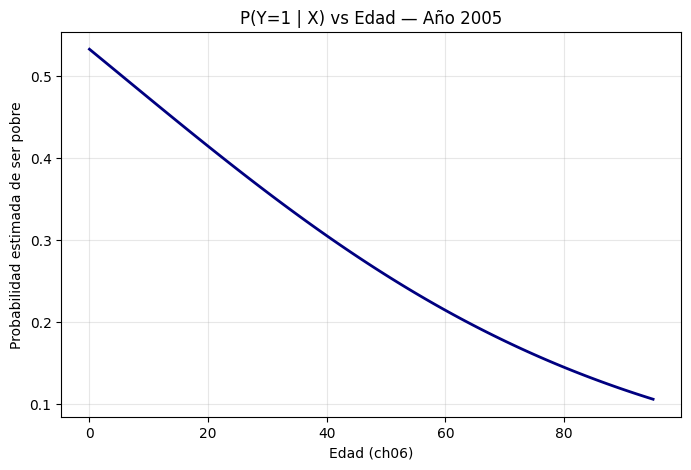

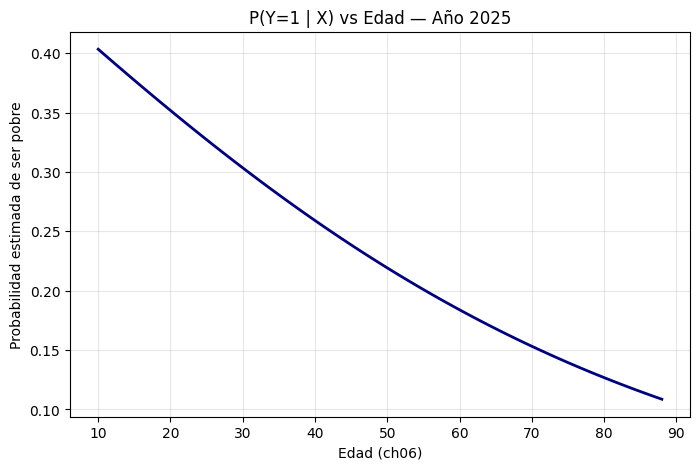

In [ ]:
# 4)

# === Punto 4: P(Y=1|X) vs edad (ch06) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Variable de interés
var = "ch06"  # edad
intercept_name = "intercept"

def fit_logit_con_intercept(X, y, intercept_name="intercept"):
    """
    Ajusta un modelo Logit robusto con intercepto explícito y limpieza de columnas constantes.
    """
    X = X.copy()
    for c in X.columns:
        X[c] = 1.0 if c == intercept_name else pd.to_numeric(X[c], errors="coerce")
    # eliminar columnas sin varianza (excepto el intercepto)
    keep = [c for c in X.columns if (c == intercept_name) or (X[c].nunique(dropna=True) > 1)]
    X = X[keep].astype(float)
    y = y.astype(float)

    mod = sm.Logit(y, X)
    res = mod.fit(disp=False, maxiter=300)
    return res

def curva_prob_vs_var(anio, var):
    """
    Dibuja la curva P(Y=1|X) en función de la variable var (aquí: edad),
    manteniendo el resto de las variables en su valor medio.
    """
    if anio not in bases_train:
        print(f"[AVISO] No hay base de entrenamiento para {anio}.")
        return

    X_train, y_train = bases_train[anio]
    if var not in X_train.columns:
        raise ValueError(f"La variable '{var}' no está en X_train de {anio}.")

    # Ajustar modelo logit con intercepto
    modelo = fit_logit_con_intercept(X_train, y_train, intercept_name)

    # Rango de valores de la variable (edad)
    x_min, x_max = np.nanmin(X_train[var].values), np.nanmax(X_train[var].values)
    x_vals = np.linspace(x_min, x_max, 100)

    # Mantener el resto en su media
    X_mean = X_train.mean(numeric_only=True).copy()
    if intercept_name in X_mean.index:
        X_mean[intercept_name] = 1.0

    # Crear dataframe de predicción
    df_pred = pd.DataFrame([X_mean.values] * len(x_vals), columns=X_mean.index)
    df_pred[var] = x_vals

    # Asegurar orden de columnas según el modelo
    df_pred = df_pred[modelo.model.exog_names]

    # Predicciones
    p_pred = modelo.predict(df_pred)

    # Gráfico
    plt.figure(figsize=(8,5))
    plt.plot(x_vals, p_pred, linewidth=2, color='navy')
    plt.xlabel("Edad (ch06)")
    plt.ylabel("Probabilidad estimada de ser pobre")
    plt.title(f"P(Y=1 | X) vs Edad — Año {anio}")
    plt.grid(alpha=0.3)
    plt.show()

# === Ejecutar para los años disponibles ===
for anio in (2005, 2025):
    if anio in bases_train:
        curva_prob_vs_var(anio, var)


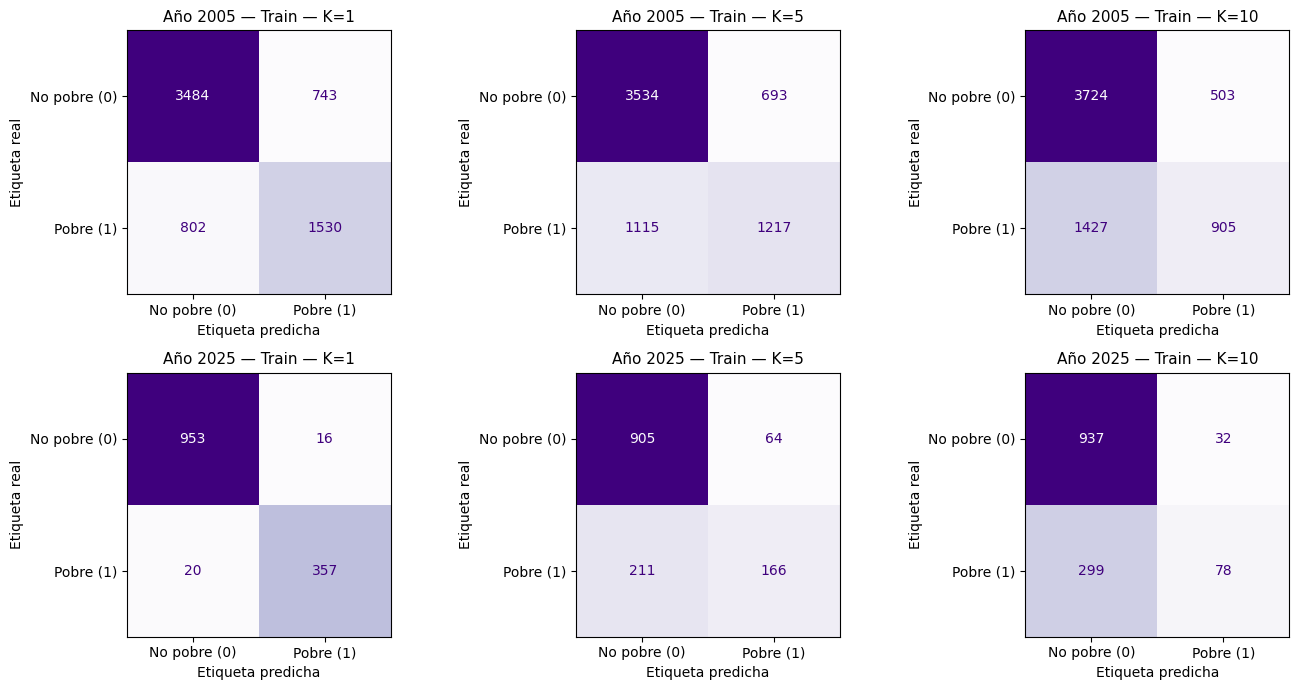

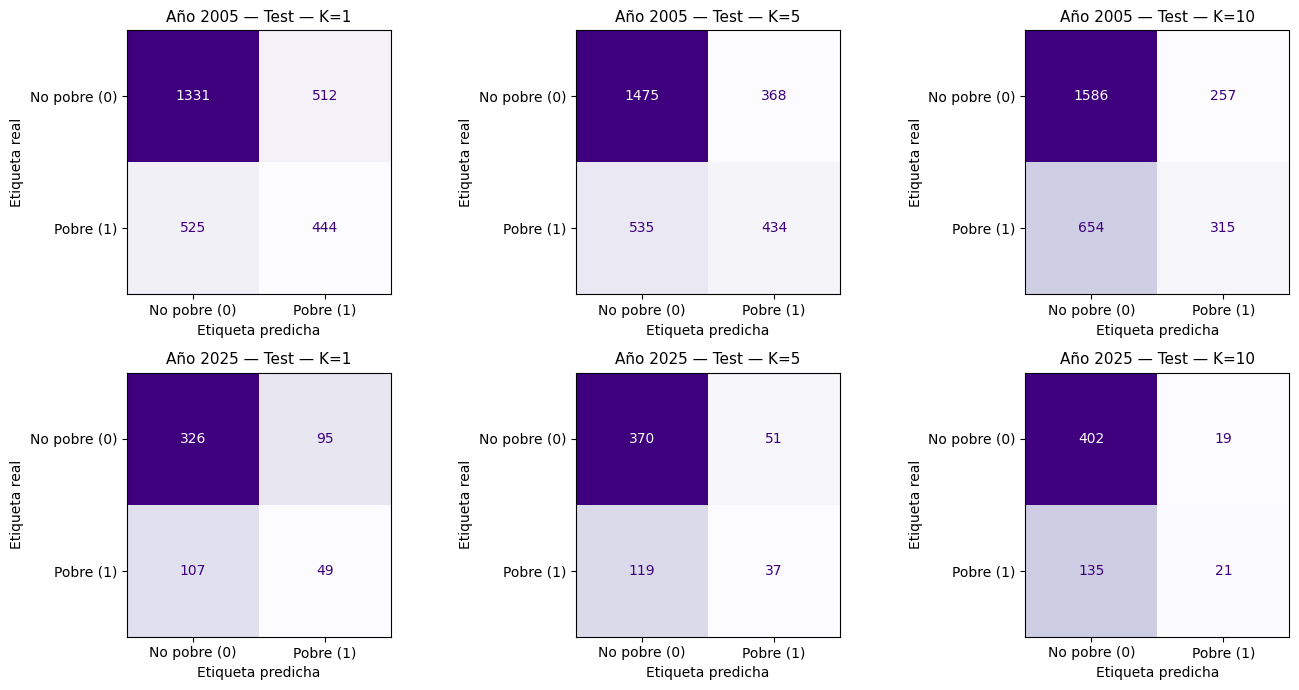


=== Resultados KNN — Año 2005 ===


,Año,K,Accuracy Train,Accuracy Test
0,2005,1,0.764,0.631
1,2005,5,0.724,0.679
2,2005,10,0.706,0.676



=== Resultados KNN — Año 2025 ===


,Año,K,Accuracy Train,Accuracy Test
0,2025,1,0.973,0.650
1,2025,5,0.796,0.705
2,2025,10,0.754,0.733



=== Resultados combinados (todos los años) ===


,Año,K,Accuracy Train,Accuracy Test
0,2005,1,0.764,0.631
1,2005,5,0.724,0.679
2,2005,10,0.706,0.676
3,2025,1,0.973,0.650
4,2025,5,0.796,0.705
5,2025,10,0.754,0.733


In [ ]:
# 5)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

K_values = [1,5,10]
years = [y for y in (2005, 2025) if y in bases_train]

# Entrenamos una sola vez y guardamos todo
resultados_knn = []
preds = {}

for año in years:
    Xtr, ytr = bases_train[año]
    Xte, yte = bases_test[año]
    Xtr = Xtr.apply(pd.to_numeric, errors='coerce').fillna(0)
    Xte = Xte.apply(pd.to_numeric, errors='coerce').fillna(0)
    ytr = ytr.astype(int); yte = yte.astype(int)

    for k in K_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(Xtr, ytr)
        yhat_tr = knn.predict(Xtr)
        yhat_te = knn.predict(Xte)

        preds[(año,k,'train')] = (ytr, yhat_tr)
        preds[(año,k,'test')]  = (yte, yhat_te)

        resultados_knn.append({
            'Año': año, 'K': k,
            'Accuracy Train': round(accuracy_score(ytr, yhat_tr), 3),
            'Accuracy Test' : round(accuracy_score(yte, yhat_te), 3)
        })

# -------- helpers para plotear en grilla 3x2 ----------
def plot_cm_grid(split='train', cmap='Purples'):
    fig, axes = plt.subplots(nrows=len(years), ncols=len(K_values), figsize=(14, 7))
    if len(years) == 1:  # por si tenés un solo año
        axes = np.array([axes])
    for i, año in enumerate(years):
        for j, k in enumerate(K_values):
            ax = axes[i, j]
            y_true, y_pred = preds[(año, k, split)]
            cm = confusion_matrix(y_true, y_pred)
            disp = ConfusionMatrixDisplay(cm, display_labels=["No pobre (0)", "Pobre (1)"])
            disp.plot(cmap=cmap, ax=ax, colorbar=False, values_format='d')
            ax.set_xlabel("Etiqueta predicha")
            ax.set_ylabel("Etiqueta real")
            ax.set_title(f"Año {año} — {split.capitalize()} — K={k}", fontsize=11)
            ax.grid(False)
    plt.tight_layout()
    plt.show()

# === Figuras como tu screenshot ===
plot_cm_grid('train')  # 1ª figura: matrices TRAIN (3 horizontales por año)
plot_cm_grid('test')   # 2ª figura: matrices TEST  (3 horizontales por año)

# === Tabla resumen de accuracies (igual a tu estilo) ===
df_knn = pd.DataFrame(resultados_knn)
for año in years:
    print(f"\n=== Resultados KNN — Año {año} ===")
    display(df_knn[df_knn['Año']==año].reset_index(drop=True))

print("\n=== Resultados combinados (todos los años) ===")
display(df_knn.reset_index(drop=True))



Año 2005 → vars usadas: ch06, pp3e_tot
[Año 2005] Outliers removidos (|z|>3.0): 27 de 6559
Figura guardada en: knn_2005_ch06_pp3e_tot.png


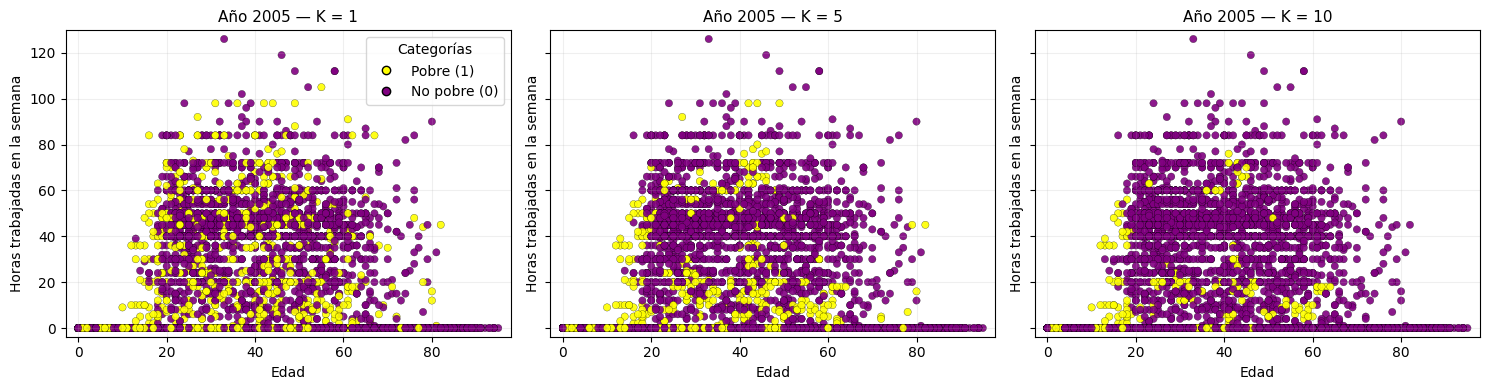


Año 2025 → vars usadas: ch06, pp3e_tot
[Año 2025] Outliers removidos (|z|>3.0): 5 de 1346
Figura guardada en: knn_2025_ch06_pp3e_tot.png


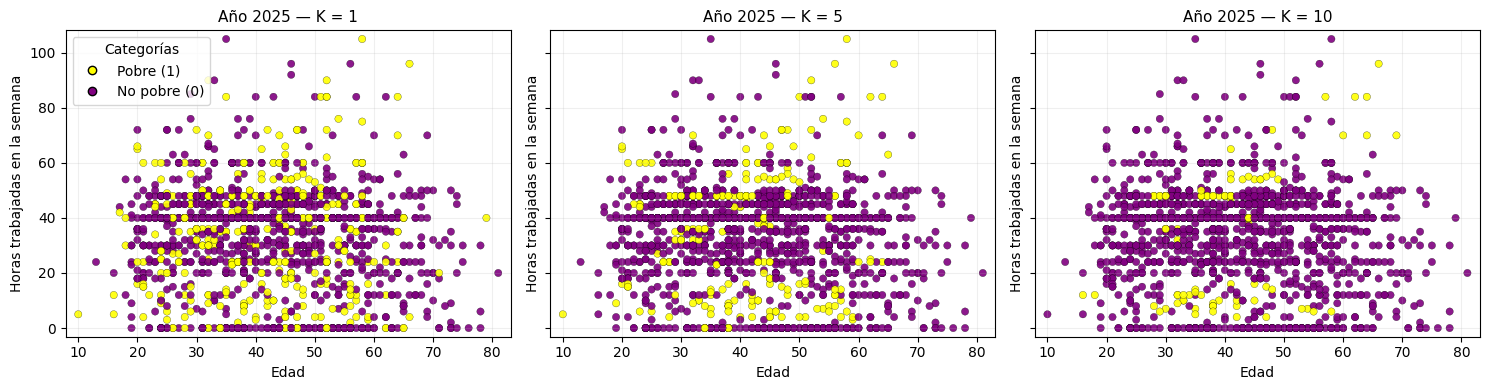

In [ ]:
# 6)

# === Punto 6: KNN con (x=ch06, y=pp3e_tot), sin fondo, quitando outliers |z|>3 ===
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from sklearn.neighbors import KNeighborsClassifier

def knn_scatter_per_k_no_bg(
    X_train, y_train,
    var_x="ch06", var_y="pp3e_tot",
    Ks=(1,5,10), anio=None,
    usar_pred=True, mostrar=True, guardar_path=None,
    quitar_outliers=True, z_th=3.0
):
    # --- tomar dos columnas específicas ---
    if var_x not in X_train.columns or var_y not in X_train.columns:
        raise ValueError(f"Faltan columnas: {var_x} o {var_y} en X_train de {anio}.")

    X2_raw = X_train[[var_x, var_y]].astype(float).to_numpy()
    y_raw  = np.asarray(y_train, dtype=int)

    # --- quitar outliers por z-score > z_th (por variable) ---
    X2, y = X2_raw, y_raw
    if quitar_outliers:
        m = np.nanmean(X2_raw, axis=0)
        s = np.nanstd(X2_raw, axis=0, ddof=0)
        s[s == 0] = np.inf
        z = (X2_raw - m) / s
        mask_in = np.all(np.abs(z) <= z_th, axis=1)
        n_drop = int((~mask_in).sum())

        if mask_in.any() and mask_in.sum() >= 5:
            print(f"[Año {anio}] Outliers removidos (|z|>{z_th}): {n_drop} de {len(X2_raw)}")
            X2 = X2_raw[mask_in]
            y  = y_raw[mask_in]
        else:
            print(f"[Año {anio}] Filtro de outliers descartado (quedaban {mask_in.sum()} puntos). Se grafican datos crudos.")

    # --- límites con pequeño padding, para compartir ejes en los 3 subplots ---
    pad_x = 0.03 * (np.nanmax(X2[:,0]) - np.nanmin(X2[:,0]) + 1e-9)
    pad_y = 0.03 * (np.nanmax(X2[:,1]) - np.nanmin(X2[:,1]) + 1e-9)
    xlim = (np.nanmin(X2[:,0]) - pad_x, np.nanmax(X2[:,0]) + pad_x)
    ylim = (np.nanmin(X2[:,1]) - pad_y, np.nanmax(X2[:,1]) + pad_y)

    # --- colores fijos (0=no pobre violeta, 1=pobre amarillo) ---
    cmap = ListedColormap(["purple", "yellow"])

    plt.close('all')
    fig, axes = plt.subplots(1, len(Ks), figsize=(5*len(Ks), 4), sharex=True, sharey=True)
    if len(Ks) == 1:
        axes = [axes]

    # --- entrenar y graficar por K ---
    for ax, k in zip(axes, Ks):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X2, y)
        colores = knn.predict(X2) if usar_pred else y

        ax.scatter(X2[:,0], X2[:,1],
                   c=colores, cmap=cmap, vmin=0, vmax=1,
                   s=28, edgecolor="k", linewidth=0.2, alpha=0.9)
        ax.set_title(f"Año {anio} — K = {k}", fontsize=11)
        ax.set_xlabel(var_x); ax.set_ylabel(var_y)
        ax.set_xlim(*xlim); ax.set_ylim(*ylim)
        ax.grid(alpha=0.2)
        ax.set_xlabel("Edad")                         # <- antes: ax.set_xlabel(var_x
        ax.set_ylabel("Horas trabajadas en la semana")# <- antes: ax.set_ylabel(var_y)



    # --- leyenda consistente ---
    legend_elements = [
        Line2D([0],[0], marker='o', linestyle='None', markerfacecolor='yellow', markeredgecolor='k',
               label='Pobre (1)', markersize=6),
        Line2D([0],[0], marker='o', linestyle='None', markerfacecolor='purple', markeredgecolor='k',
               label='No pobre (0)', markersize=6),
    ]
    axes[0].legend(handles=legend_elements, title="Categorías", loc="best", frameon=True)

    plt.tight_layout()

    # --- guardar/mostrar ---
    if guardar_path is None:
        guardar_path = f"knn_{anio}_{var_x}_{var_y}.png"
    fig.savefig(guardar_path, dpi=200, bbox_inches="tight")
    print(f"Figura guardada en: {guardar_path}")

    if mostrar:
        plt.show()
    else:
        plt.close(fig)

    return fig, axes

# === Ejecutar para 2005 y 2025 (como en tu imagen, horizontal) ===
for anio in [2005, 2025]:
    if anio in bases_train:
        X_train, y_train = bases_train[anio]
        print(f"\nAño {anio} → vars usadas: ch06, pp3e_tot")
        knn_scatter_per_k_no_bg(
            X_train, y_train,
            var_x="ch06", var_y="pp3e_tot",
            Ks=(1,5,10), anio=anio,
            usar_pred=True, quitar_outliers=True, z_th=3.0,
            mostrar=True, guardar_path=f"knn_{anio}_ch06_pp3e_tot.png"
        )


Base CV 2025 → n=1923 obs | p=5 variables
K óptimo (5-fold CV, 2025) → K = 21 | Accuracy prom = 0.736 (±0.016)


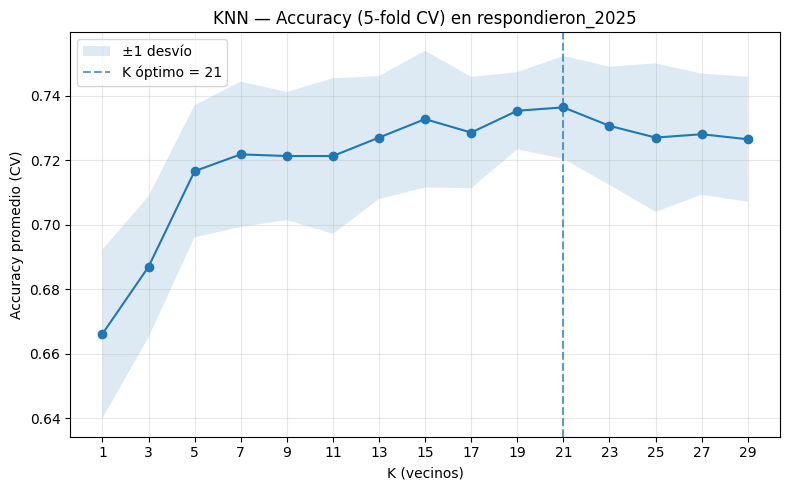

Modelo final entrenado: knn_kcv_2025 (pipeline). Columnas usadas: 5


In [ ]:
# 7)

# === Punto 7: Selección de K por 5-fold CV en respondieron_2025 (KNN con K-CV) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# 1) Reconstruir base completa 2025 (train ∪ test) con las MISMAS columnas que venimos usando
assert 2025 in bases_train and 2025 in bases_test, "Faltan splits 2025 en bases_train/test."

Xtr_25, ytr_25 = bases_train[2025]
Xte_25, yte_25 = bases_test[2025]

X_25_full = pd.concat([Xtr_25, Xte_25], axis=0)
y_25_full = pd.concat([ytr_25, yte_25], axis=0)

# 2) Preprocesamiento coherente (toda X, sin 'intercept', numérico, sin columnas constantes)
def prep_X_all_numeric(X):
    Xn = X.copy()
    if "intercept" in Xn.columns:
        Xn = Xn.drop(columns=["intercept"])
    for c in Xn.columns:
        Xn[c] = pd.to_numeric(Xn[c], errors="coerce")
    keep = [c for c in Xn.columns if Xn[c].nunique(dropna=True) > 1]
    return Xn[keep]

X_25_num = prep_X_all_numeric(X_25_full)

mask_ok = X_25_num.notna().all(axis=1) & y_25_full.notna()
X_25_num = X_25_num.loc[mask_ok]
y_25     = y_25_full.loc[mask_ok].astype(int)

print(f"Base CV 2025 → n={len(y_25)} obs | p={X_25_num.shape[1]} variables")

# 3) Grilla de K y esquema CV
Ks = list(range(1, 31, 2))  # 1,3,5,...,29 (podés ampliar si querés)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=444)

def make_pipeline(k):
    # Escalado DENTRO del fold (no hay fuga) + KNN
    return Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k, weights="uniform"))
    ])

# 4) Accuracy CV por K
acc_mean, acc_std = [], []
for k in Ks:
    pipe = make_pipeline(k)
    scores = cross_val_score(pipe, X_25_num.values, y_25.values,
                             cv=cv, scoring="accuracy", n_jobs=None)
    acc_mean.append(scores.mean())
    acc_std.append(scores.std())

acc_mean = np.array(acc_mean); acc_std = np.array(acc_std)
k_opt_idx = int(acc_mean.argmax())
k_opt = Ks[k_opt_idx]
print(f"K óptimo (5-fold CV, 2025) → K = {k_opt} | Accuracy prom = {acc_mean[k_opt_idx]:.3f} (±{acc_std[k_opt_idx]:.3f})")

# 5) Gráfico Accuracy vs K (estilo tutorial)
plt.figure(figsize=(8,5))
plt.plot(Ks, acc_mean, marker="o")
plt.fill_between(Ks, acc_mean-acc_std, acc_mean+acc_std, alpha=0.15, label="±1 desvío")
plt.axvline(k_opt, linestyle="--", alpha=0.7, label=f"K óptimo = {k_opt}")
plt.title("KNN — Accuracy (5-fold CV) en respondieron_2025")
plt.xlabel("K (vecinos)"); plt.ylabel("Accuracy promedio (CV)")
plt.xticks(Ks)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 6) Entrenar el modelo final “KNN con K-CV” sobre TODA la base 2025 con K óptimo
knn_kcv_2025 = make_pipeline(k_opt)
knn_kcv_2025.fit(X_25_num.values, y_25.values)

# Guardar columnas para alinear luego (puntos 8–10)
cols_kcv_25 = X_25_num.columns.tolist()
print(f"Modelo final entrenado: knn_kcv_2025 (pipeline). Columnas usadas: {len(cols_kcv_25)}")


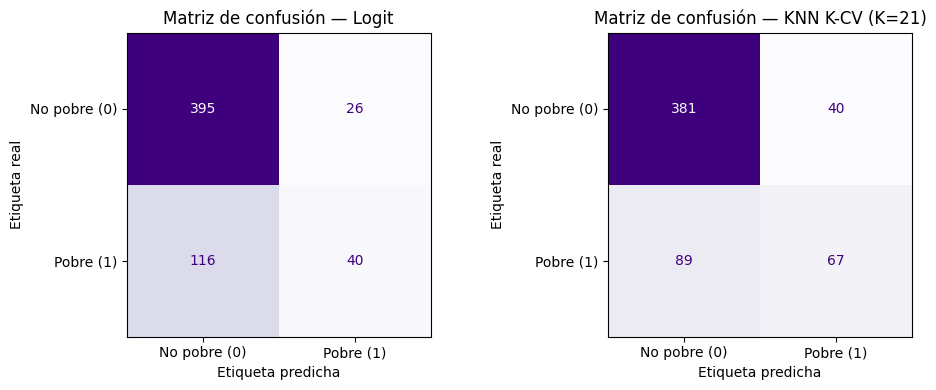

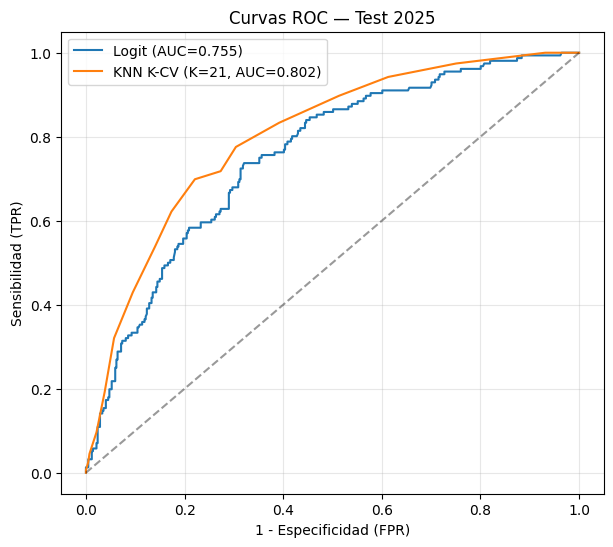

=== Métricas comparativas en test 2025 ===


,Accuracy,Precision,Recall,AUC
Logit,0.754,0.606,0.256,0.755
KNN K-CV (K=21),0.776,0.626,0.429,0.802


In [ ]:
# 8)


# === Punto 8: Comparación Logit vs KNN K-CV (test 2025) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score,
    accuracy_score, precision_score, recall_score
)
import statsmodels.api as sm

# ---------- Funciones auxiliares ----------
def prep_X_all_numeric(X):
    Xn = X.copy()
    Xn = Xn.drop(columns=["intercept"], errors="ignore")
    for c in Xn.columns:
        Xn[c] = pd.to_numeric(Xn[c], errors="coerce")
    keep = [c for c in Xn.columns if Xn[c].nunique(dropna=True) > 1]
    return Xn[keep]

def fit_logit_same_style(X_train, y_train, intercept_name="intercept"):
    X = X_train.copy()
    for c in X.columns:
        X[c] = 1.0 if c == intercept_name else pd.to_numeric(X[c], errors="coerce")
    cols = [c for c in X.columns if (c == intercept_name) or (X[c].nunique(dropna=True) > 1)]
    X = X[cols].astype(float)
    y = y_train.astype(float)
    modelo = sm.Logit(y, X)
    res = modelo.fit(disp=False, maxiter=300)
    return res

# ---------- Modelos ----------
# Logit
try:
    res25
except NameError:
    Xtr25, ytr25 = bases_train[2025]
    res25 = fit_logit_same_style(Xtr25, ytr25)

# KNN con K óptimo ya entrenado (del punto 7)
try:
    knn_kcv_2025
except NameError:
    print("⚠️ No se encontró el modelo KNN K-CV, corré el punto 7 antes.")
    raise

# ---------- TEST ----------
X_test, y_test = bases_test[2025]
y_true = y_test.astype(int)

# --- Logit: probas y clases ---
X_logit = X_test.copy()
for c in X_logit.columns:
    X_logit[c] = pd.to_numeric(X_logit[c], errors="coerce")
X_logit = X_logit[res25.model.exog_names]  # mismo orden que en entrenamiento
mask_log = X_logit.notna().all(axis=1) & y_true.notna()
p_logit = pd.Series(res25.predict(X_logit.loc[mask_log]), index=X_logit.index[mask_log])
y_pred_logit = (p_logit > 0.5).astype(int)

# --- KNN K-CV: probas y clases ---
X_knn = X_test.drop(columns=["intercept"], errors="ignore")
X_knn = X_knn[cols_kcv_25].apply(pd.to_numeric, errors="coerce")
mask_knn = X_knn.notna().all(axis=1) & y_true.notna()
p_knn = pd.Series(knn_kcv_2025.predict_proba(X_knn.loc[mask_knn].values)[:,1], index=X_knn.index[mask_knn])
y_pred_knn = (p_knn > 0.5).astype(int)

# ---------- Matrices de confusión ----------
fig, axes = plt.subplots(1, 2, figsize=(10,4))
for ax, y_pred, title in zip(
    axes,
    [y_pred_logit, y_pred_knn],
    ["Logit", f"KNN K-CV (K={k_opt})"]
):
    y_ref = y_true.loc[y_pred.index]
    cm = confusion_matrix(y_ref, y_pred)
    ConfusionMatrixDisplay(
        cm,
        display_labels=["No pobre (0)","Pobre (1)"]
    ).plot(ax=ax, cmap="Purples", colorbar=False)
    ax.set_title(f"Matriz de confusión — {title}")
    ax.set_xlabel("Etiqueta predicha")
    ax.set_ylabel("Etiqueta real")
plt.tight_layout(); plt.show()

# ---------- Curvas ROC ----------
y_ref_log = y_true.loc[p_logit.index]
y_ref_knn = y_true.loc[p_knn.index]
fpr_log, tpr_log, _ = roc_curve(y_ref_log, p_logit)
fpr_knn, tpr_knn, _ = roc_curve(y_ref_knn, p_knn)
auc_log = roc_auc_score(y_ref_log, p_logit)
auc_knn = roc_auc_score(y_ref_knn, p_knn)

plt.figure(figsize=(7,6))
plt.plot(fpr_log, tpr_log, label=f"Logit (AUC={auc_log:.3f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN K-CV (K={k_opt}, AUC={auc_knn:.3f})")
plt.plot([0,1],[0,1],"k--",alpha=0.4)
plt.xlabel("1 - Especificidad (FPR)")
plt.ylabel("Sensibilidad (TPR)")
plt.title("Curvas ROC — Test 2025")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ---------- Métricas ----------
def metrics_block(y_true_aligned, y_pred, proba):
    return {
        "Accuracy":  accuracy_score(y_true_aligned, y_pred),
        "Precision": precision_score(y_true_aligned, y_pred, zero_division=0),
        "Recall":    recall_score(y_true_aligned, y_pred, zero_division=0),
        "AUC":       roc_auc_score(y_true_aligned, proba)
    }

m_log = metrics_block(y_true.loc[y_pred_logit.index], y_pred_logit, p_logit.loc[y_pred_logit.index])
m_knn = metrics_block(y_true.loc[y_pred_knn.index],  y_pred_knn,  p_knn.loc[y_pred_knn.index])

metrics_df = pd.DataFrame([m_log, m_knn], index=["Logit", f"KNN K-CV (K={k_opt})"]).round(3)
print("=== Métricas comparativas en test 2025 ===")
display(metrics_df)


In [ ]:
# === Replicar derivadas en NORESPONDIERON exactamente como en RESPONDIERON + Punto 10 ===
import numpy as np
import pandas as pd

# --- 0) Copia y tipos base (igual que hiciste en respondieron) ---
noresp = norespondieron.copy()

noresp['ano4'] = pd.to_numeric(noresp['ano4'], errors='coerce')
noresp['itf']  = pd.to_numeric(noresp['itf'],  errors='coerce')
noresp['ipcf'] = pd.to_numeric(noresp.get('ipcf'), errors='coerce')

# --- 1) nivel_ed_ord (mismo mapa) ---
map_nivel_orden = {
    'Sin instrucción': 0,
    'Primaria Incompleta (incluye educación especial)': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Ns./Nr.': np.nan
}
if 'nivel_ed' in noresp.columns:
    noresp['nivel_ed_ord'] = noresp['nivel_ed'].replace(map_nivel_orden).astype('float')
else:
    noresp['nivel_ed_ord'] = np.nan  # la completamos por imputación luego

# --- 2) estado_laboral (1=ocupado, 0=desocupado, NaN=otros) ---
if 'estado' in noresp.columns:
    noresp["estado_laboral"] = np.select(
        [noresp["estado"] == 1, noresp["estado"] == 2],
        [1, 0],
        default=np.nan
    ).astype("float64")
else:
    noresp["estado_laboral"] = np.nan

# --- 3) alfabetismo (1=sabe leer y escribir, 0=no, NaN=otros) ---
if 'ch09' in noresp.columns:
    noresp["alfabetismo"] = np.select(
        [noresp["ch09"] == 1, noresp["ch09"] == 2],
        [1, 0],
        default=np.nan
    ).astype("float64")
else:
    noresp["alfabetismo"] = np.nan

# --- 4) Sub-base 2025 ---
norespondieron_2025 = noresp.loc[noresp['ano4'].round().eq(2025)].copy().reset_index(drop=True)
print(f"norespondieron_2025: {norespondieron_2025.shape}")

# ================== PUNTO 10: Predicción con KNN K-CV (K=21) ==================

# Aseguramos tener el modelo y las columnas del punto 7
assert 'knn_kcv_2025' in globals() and 'cols_kcv_25' in globals(), "Corré el punto 7 antes (KNN K-CV)."

# 5) Medianas de referencia 2025 (respondieron train∪test) para imputar
Xtr25, ytr25 = bases_train[2025]
Xte25, yte25 = bases_test[2025]
Xref = pd.concat([Xtr25, Xte25], axis=0).drop(columns=['intercept'], errors='ignore')
Xref = Xref.reindex(columns=cols_kcv_25)
for c in Xref.columns:
    Xref[c] = pd.to_numeric(Xref[c], errors='coerce')
medianas_2025 = Xref.median(numeric_only=True)

# 6) Armar X de norespondieron_2025 con EXACTAMENTE las columnas del modelo
X_noresp = norespondieron_2025.drop(columns=['intercept'], errors='ignore')
X_noresp = X_noresp.reindex(columns=cols_kcv_25)
for c in X_noresp.columns:
    X_noresp[c] = pd.to_numeric(X_noresp[c], errors='coerce')

falt = int(X_noresp.isna().sum().sum())
X_pred = X_noresp.fillna(medianas_2025)
print(f"Celdas imputadas por mediana: {falt}")
print(f"Filas para predicción: {len(X_pred)}")

# 7) Predecir probabilidad y clase (umbral 0.5)
p_pred = knn_kcv_2025.predict_proba(X_pred.values)[:, 1]
y_pred = (p_pred > 0.5).astype(int)

# 8) Proporción de pobres en norespondieron_2025
prop_pobre = float(np.mean(y_pred))
print(f"Proporción estimada de pobres en norespondieron_2025: {prop_pobre:.3f} ({prop_pobre*100:.1f}%)")

# (Opcional) dataframe de resultados
pred_noresp_2025 = X_pred.copy()
pred_noresp_2025["prob_pobre"] = p_pred
pred_noresp_2025["pred_pobre"] = y_pred
# display(pred_noresp_2025.head())


norespondieron_2025: (2872, 171)
Celdas imputadas por mediana: 1428
Filas para predicción: 2872
Proporción estimada de pobres en norespondieron_2025: 0.186 (18.6%)


In [ ]:
df = respondieron.copy()

df["estado_laboral"] = np.select(
    [df["estado"] == 1, df["estado"] == 2],
    [1, 0],
    default=np.nan
).astype("float64")

df["alfabetismo"] = np.select(
    [df["ch09"] == 1, df["ch09"] == 2],
    [1, 0],
    default=np.nan
).astype("float64")


In [ ]:
#######################ARRANCA TP4############################

In [ ]:
print(df.columns.tolist())


['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', '

In [ ]:
print(df["estado_laboral"].value_counts(dropna=False))


estado_laboral
NaN    7074
1.0    5799
0.0     807
Name: count, dtype: int64


El objetivo de este trabajo es evaluar la predicción de pobres utilizando
técnicas de regularización y de árboles. Van a utilizar las mismas bases
X_train, y_train, X_test, y_test para cada año que crearon en el TP3.
Usen las mismas variables que usaron en el TP3 para predecir. Si piensan
que hay más variables que son relevantes para predecir la pobreza las
pueden incluir.
Aclaración: usen únicamente la base de 2025.

In [ ]:
# VARIABLES DEL MODELO (las del TP3, ahora sí incluyendo estado_laboral)
x_vars = ["ch04", "ch06", "nivel_ed_ord", "estado_laboral", "alfabetismo", "pp3e_tot"]

from sklearn.model_selection import train_test_split

# filtramos solo 2025
base_2025 = df.loc[df["ano4"] == 2025].copy()

# armamos X e y
X25 = base_2025[x_vars].copy()
y25 = base_2025["pobre"].astype(int).copy()

# filas completas
mask25 = X25.notna().all(axis=1)
X25 = X25.loc[mask25]
y25 = y25.loc[mask25]

# train/test 2025 (igual que TP3)
X_train_2025, X_test_2025, y_train_2025, y_test_2025 = train_test_split(
    X25, y25,
    test_size=0.30,
    random_state=123,
    stratify=y25
)

print("Columnas en X_train_2025:")
print(X_train_2025.columns.tolist())

print("Tamaños:", X_train_2025.shape, X_test_2025.shape)


Columnas en X_train_2025:
['ch04', 'ch06', 'nivel_ed_ord', 'estado_laboral', 'alfabetismo', 'pp3e_tot']
Tamaños: (1346, 6) (577, 6)


In [ ]:
# traer las bases del TP3 (ya corregidas)
X_train_ml = X_train_2025.copy()
y_train_ml = y_train_2025.copy()

X_test_ml = X_test_2025.copy()
y_test_ml = y_test_2025.copy()

print(X_train_ml.columns)


Index(['ch04', 'ch06', 'nivel_ed_ord', 'estado_laboral', 'alfabetismo',
       'pp3e_tot'],
      dtype='object')


ANTES DEL 1)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# parto de 'respondieron' del tp3
df = respondieron.copy()
df.columns = df.columns.str.lower()

# recreo por las dudas las dummies igual que antes
df["estado_laboral"] = np.select(
    [df["estado"] == 1, df["estado"] == 2],
    [1, 0],
    default=np.nan
).astype(float)

df["alfabetismo"] = np.select(
    [df["ch09"] == 1, df["ch09"] == 2],
    [1, 0],
    default=np.nan
).astype(float)

# me quedo SOLO con 2025
df25 = df.loc[df["ano4"] == 2025].copy()

# mismas variables que en el tp3
x_vars = ["ch04", "ch06", "nivel_ed_ord", "estado_laboral", "alfabetismo", "pp3e_tot"]

# coerción a numérico
for c in x_vars + ["pobre"]:
    df25[c] = pd.to_numeric(df25[c], errors="coerce")

X = df25[x_vars].copy()
y = df25["pobre"].astype(int).copy()

# split 70/30 como siempre
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=123,
    stratify=y
)

print("columnas de X_train:", X_train.columns.tolist())
print("shapes:", X_train.shape, X_test.shape)


columnas de X_train: ['ch04', 'ch06', 'nivel_ed_ord', 'estado_laboral', 'alfabetismo', 'pp3e_tot']
shapes: (3016, 6) (1293, 6)


EJERCICIO 1)

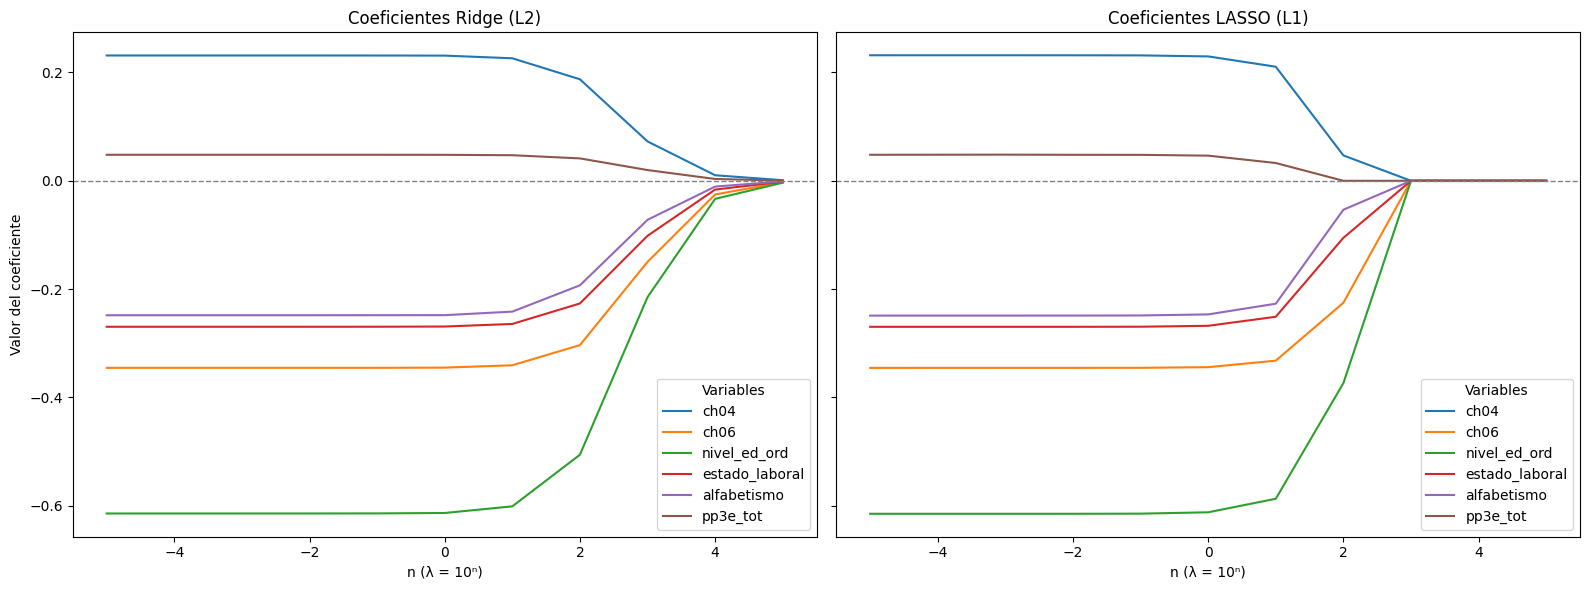

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# uso directamente X_train y y_train del bloque anterior
X_train_ml = X_train.copy()
y_train_ml = y_train.copy()

# grilla de λ
n_values = np.arange(-5, 6)
lambda_values = 10.0 ** n_values
C_values = 1.0 / lambda_values

coefs_ridge = []
coefs_lasso = []

for C in C_values:
    # ridge
    ridge = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(
            penalty="l2",
            C=C,
            solver="lbfgs",
            max_iter=2000
        ))
    ])
    ridge.fit(X_train_ml, y_train_ml)
    coefs_ridge.append(ridge.named_steps["logreg"].coef_.ravel())

    # lasso
    lasso = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(
            penalty="l1",
            C=C,
            solver="saga",
            max_iter=3000
        ))
    ])
    lasso.fit(X_train_ml, y_train_ml)
    coefs_lasso.append(lasso.named_steps["logreg"].coef_.ravel())

coef_ridge_df = pd.DataFrame(coefs_ridge, columns=x_vars, index=n_values)
coef_lasso_df = pd.DataFrame(coefs_lasso, columns=x_vars, index=n_values)

fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)

# ridge
axes[0].set_title("Coeficientes Ridge (L2)")
for c in x_vars:
    axes[0].plot(n_values, coef_ridge_df[c], label=c)
axes[0].axhline(0, color="gray", linestyle="--", linewidth=1)
axes[0].set_xlabel("n (λ = 10ⁿ)")
axes[0].set_ylabel("Valor del coeficiente")
axes[0].legend(title="Variables")

# lasso
axes[1].set_title("Coeficientes LASSO (L1)")
for c in x_vars:
    axes[1].plot(n_values, coef_lasso_df[c], label=c)
axes[1].axhline(0, color="gray", linestyle="--", linewidth=1)
axes[1].set_xlabel("n (λ = 10ⁿ)")
axes[1].legend(title="Variables")

plt.tight_layout()
plt.show()


EJERCICIO 2

Ridge → mejor λ^cv ≈ 10^0.00  (λ ≈ 1.000000, C ≈ 1.000000)
LASSO → mejor λ^cv ≈ 10^1.00  (λ ≈ 10.000000, C ≈ 0.100000)


/tmp/ipython-input-171284262.py:115: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(
/tmp/ipython-input-171284262.py:125: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(


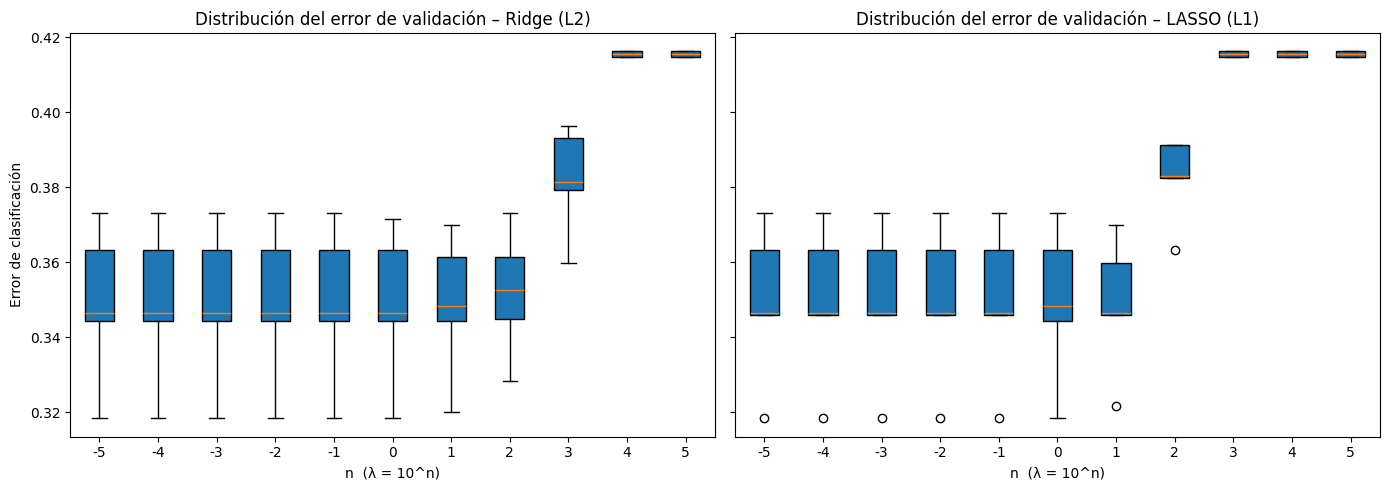

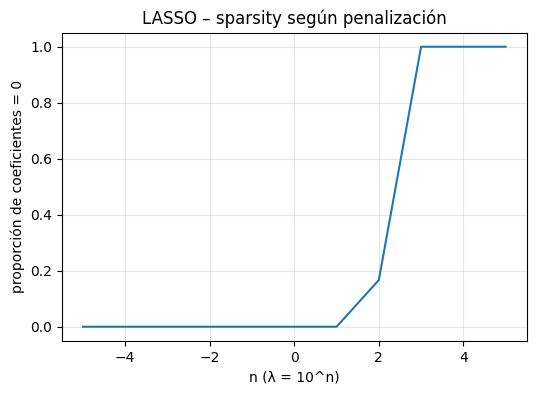

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer

# ============================================================
# 0) usamos X_train_ml, y_train_ml del punto 1
#    (deben tener las columnas: ch04, ch06, nivel_ed_ord,
#     estado_laboral, alfabetismo, pp3e_tot)
# ============================================================

# 1) grilla de penalizaciones: λ = 10^n  →  C = 1/λ
n_values = np.arange(-5, 6)              # -5, -4, ..., 5
lambda_values = 10.0 ** n_values
C_values = 1.0 / lambda_values

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=444)

def cv_errors_from_lr_cv(model_cv):
    """
    arma un df con el error (1 - accuracy) de validación de cada fold
    para cada C que probó LogisticRegressionCV.
    """
    rows = []
    # model_cv.scores_[1] tiene shape (n_folds, n_Cs) para la clase positiva = 1
    scores = model_cv.scores_[1]
    for j, C in enumerate(model_cv.Cs_):
        accs = scores[:, j]             # accuracies de cada fold
        errs = 1 - accs                 # errores = 1 - accuracy
        lam = 1.0 / C
        n_val = np.log10(lam)
        for fold_id, e in enumerate(errs, start=1):
            rows.append({
                "C": C,
                "lambda": lam,
                "n": n_val,
                "fold": fold_id,
                "error": e
            })
    return pd.DataFrame(rows)

# ============================================================
# 2) LOGISTIC REGRESSION CV – RIDGE (L2)
# ============================================================

ridge_cv_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("logcv", LogisticRegressionCV(
        Cs=C_values,
        cv=cv,
        penalty="l2",
        solver="lbfgs",
        scoring="accuracy",
        max_iter=5000
    ))
])

ridge_cv_pipe.fit(X_train_ml, y_train_ml)

ridge_lr = ridge_cv_pipe.named_steps["logcv"]
ridge_best_C = ridge_lr.C_[0]
ridge_best_lambda = 1.0 / ridge_best_C
ridge_best_n = np.log10(ridge_best_lambda)

print(f"Ridge → mejor λ^cv ≈ 10^{ridge_best_n:.2f}  (λ ≈ {ridge_best_lambda:.6f}, C ≈ {ridge_best_C:.6f})")

ridge_err_df = cv_errors_from_lr_cv(ridge_lr)

# ============================================================
# 3) LOGISTIC REGRESSION CV – LASSO (L1)
# ============================================================

lasso_cv_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("logcv", LogisticRegressionCV(
        Cs=C_values,
        cv=cv,
        penalty="l1",
        solver="saga",
        scoring="accuracy",
        max_iter=5000
    ))
])

lasso_cv_pipe.fit(X_train_ml, y_train_ml)

lasso_lr = lasso_cv_pipe.named_steps["logcv"]
lasso_best_C = lasso_lr.C_[0]
lasso_best_lambda = 1.0 / lasso_best_C
lasso_best_n = np.log10(lasso_best_lambda)

print(f"LASSO → mejor λ^cv ≈ 10^{lasso_best_n:.2f}  (λ ≈ {lasso_best_lambda:.6f}, C ≈ {lasso_best_C:.6f})")

lasso_err_df = cv_errors_from_lr_cv(lasso_lr)

# ============================================================
# 4) BOXPLOTS DE ERROR POR λ
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# ordenamos por n (equivale a ordenar por λ)
ridge_n_sorted = sorted(ridge_err_df["n"].unique())
lasso_n_sorted = sorted(lasso_err_df["n"].unique())

# --- ridge ---
axes[0].set_title("Distribución del error de validación – Ridge (L2)")
axes[0].boxplot(
    [ridge_err_df[ridge_err_df["n"] == n]["error"] for n in ridge_n_sorted],
    labels=[int(n) for n in ridge_n_sorted],
    patch_artist=True
)
axes[0].set_xlabel("n  (λ = 10^n)")
axes[0].set_ylabel("Error de clasificación")

# --- lasso ---
axes[1].set_title("Distribución del error de validación – LASSO (L1)")
axes[1].boxplot(
    [lasso_err_df[lasso_err_df["n"] == n]["error"] for n in lasso_n_sorted],
    labels=[int(n) for n in lasso_n_sorted],
    patch_artist=True
)
axes[1].set_xlabel("n  (λ = 10^n)")

plt.tight_layout()
plt.show()

# ============================================================
# 5) OPCIONAL: proporción de coeficientes en 0 para cada λ (LASSO)
# ============================================================

zeros_per_lambda = []
for C, n in zip(C_values, n_values):
    tmp = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(
            penalty="l1",
            C=C,
            solver="saga",
            max_iter=5000
        ))
    ])
    tmp.fit(X_train_ml, y_train_ml)
    coefs = tmp.named_steps["logreg"].coef_.ravel()
    prop_zeros = np.mean(coefs == 0)
    zeros_per_lambda.append({
        "n": n,
        "lambda": 10.0 ** n,
        "prop_zeros": prop_zeros
    })

zeros_df = pd.DataFrame(zeros_per_lambda)

plt.figure(figsize=(6,4))
plt.plot(zeros_df["n"], zeros_df["prop_zeros"])
plt.xlabel("n (λ = 10^n)")
plt.ylabel("proporción de coeficientes = 0")
plt.title("LASSO – sparsity según penalización")
plt.grid(alpha=0.3)
plt.show()


In [ ]:
#3
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# ------------------------------------------------------------------
# 0) uso las mismas X e y del punto 1/2
#    (deberían existir X_train_ml, y_train_ml, ridge_best_C, lasso_best_C)
# ------------------------------------------------------------------

vars_tp3 = ["ch04", "ch06", "nivel_ed_ord", "estado_laboral", "alfabetismo", "pp3e_tot"]

X_train_m = X_train_ml.copy()[vars_tp3]
y_train_m = y_train_ml.copy()

# ------------------------------------------------------------------
# 1) LOGIT SIN PENALIDAD
#    (penalty=None en lugar de 'none')
# ------------------------------------------------------------------

logit_none = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler()),
    ("logreg", LogisticRegression(
        penalty=None,          # <--- ESTA ES LA CLAVE
        solver="lbfgs",
        max_iter=5000
    ))
])

logit_none.fit(X_train_m, y_train_m)
coef_none = logit_none.named_steps["logreg"].coef_.ravel()

# ------------------------------------------------------------------
# 2) LOGIT L1 con C óptimo (λ óptimo del punto 2)
# ------------------------------------------------------------------

logit_l1 = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler()),
    ("logreg", LogisticRegression(
        penalty="l1",
        C=lasso_best_C,        # sacado del ejercicio 2
        solver="saga",
        max_iter=5000
    ))
])

logit_l1.fit(X_train_m, y_train_m)
coef_l1 = logit_l1.named_steps["logreg"].coef_.ravel()

# ------------------------------------------------------------------
# 3) LOGIT L2 con C óptimo (λ óptimo del punto 2)
# ------------------------------------------------------------------

logit_l2 = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler()),
    ("logreg", LogisticRegression(
        penalty="l2",
        C=ridge_best_C,        # sacado del ejercicio 2
        solver="lbfgs",
        max_iter=5000
    ))
])

logit_l2.fit(X_train_m, y_train_m)
coef_l2 = logit_l2.named_steps["logreg"].coef_.ravel()

# ------------------------------------------------------------------
# 4) TABLA FINAL DE COEFICIENTES
# ------------------------------------------------------------------

coef_table = pd.DataFrame({
    "variable": vars_tp3,
    "coef_sin_penalidad": coef_none,
    "coef_L1": coef_l1,
    "coef_L2": coef_l2
})

print("\n=== Tabla de coeficientes (ejercicio 3) ===\n")
print(coef_table)

# si querés guardarla:
coef_table.to_csv("coeficientes_logit_tp4_ej3.csv", index=False)



=== Tabla de coeficientes (ejercicio 3) ===

         variable  coef_sin_penalidad   coef_L1   coef_L2
0            ch04            0.231365  0.210608  0.231131
1            ch06           -0.345314 -0.332031 -0.344908
2    nivel_ed_ord           -0.614167 -0.587010 -0.613249
3  estado_laboral           -0.269473 -0.251016 -0.269038
4     alfabetismo           -0.248199 -0.226895 -0.248039
5        pp3e_tot            0.048053  0.032845  0.047946


Mejor ccp_alpha = 0.00122
Error de clasificación mínimo = 0.3316


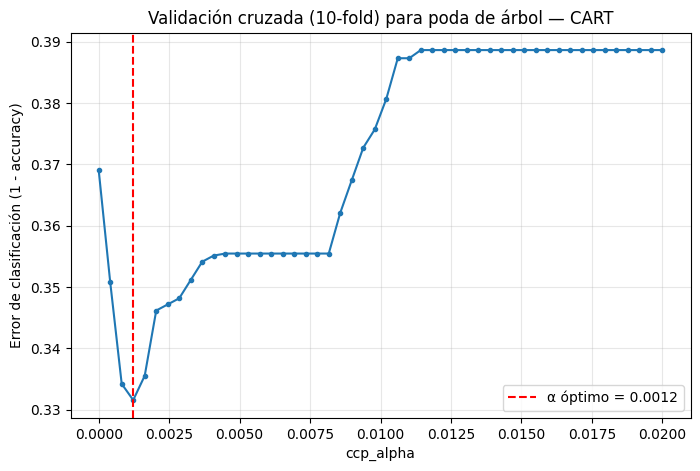

In [ ]:
# ======================================
#  Ejercicio 4 TP4 — Árbol podado (CART)
# ======================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# --------------------------------------
# 1) Definir grilla de ccp_alpha
#    (de valores muy bajos — árbol grande —
#     a valores altos — árbol más podado)
# --------------------------------------

ccp_values = np.linspace(0, 0.02, 50)   # 50 valores entre 0 y 0.02

# guardo el error promedio de CV
cv_errors = []

# --------------------------------------
# 2) Cross-validation para cada ccp_alpha
# --------------------------------------

for alpha in ccp_values:
    model = DecisionTreeClassifier(
        random_state=444,
        ccp_alpha=alpha,
        min_samples_split=20,   # opcional, lo deja más estable
        min_samples_leaf=5
    )

    # accuracy en validación (10 folds)
    acc = cross_val_score(model, X_train_ml, y_train_ml,
                          cv=10, scoring="accuracy")

    # guardo el error = 1 - accuracy promedio
    cv_errors.append(1 - acc.mean())

# lo paso a DataFrame para ver mejor
df_cart = pd.DataFrame({
    "ccp_alpha": ccp_values,
    "cv_error": cv_errors
})

# alpha óptimo
best_row = df_cart.loc[df_cart["cv_error"].idxmin()]
best_alpha = best_row["ccp_alpha"]
best_error = best_row["cv_error"]

print(f"Mejor ccp_alpha = {best_alpha:.5f}")
print(f"Error de clasificación mínimo = {best_error:.4f}")

# --------------------------------------
# 3) GRÁFICO del error según ccp_alpha
# --------------------------------------

plt.figure(figsize=(8,5))
plt.plot(ccp_values, cv_errors, marker="o", markersize=3)
plt.axvline(best_alpha, color="red", linestyle="--", label=f"α óptimo = {best_alpha:.4f}")
plt.xlabel("ccp_alpha")
plt.ylabel("Error de clasificación (1 - accuracy)")
plt.title("Validación cruzada (10-fold) para poda de árbol — CART")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


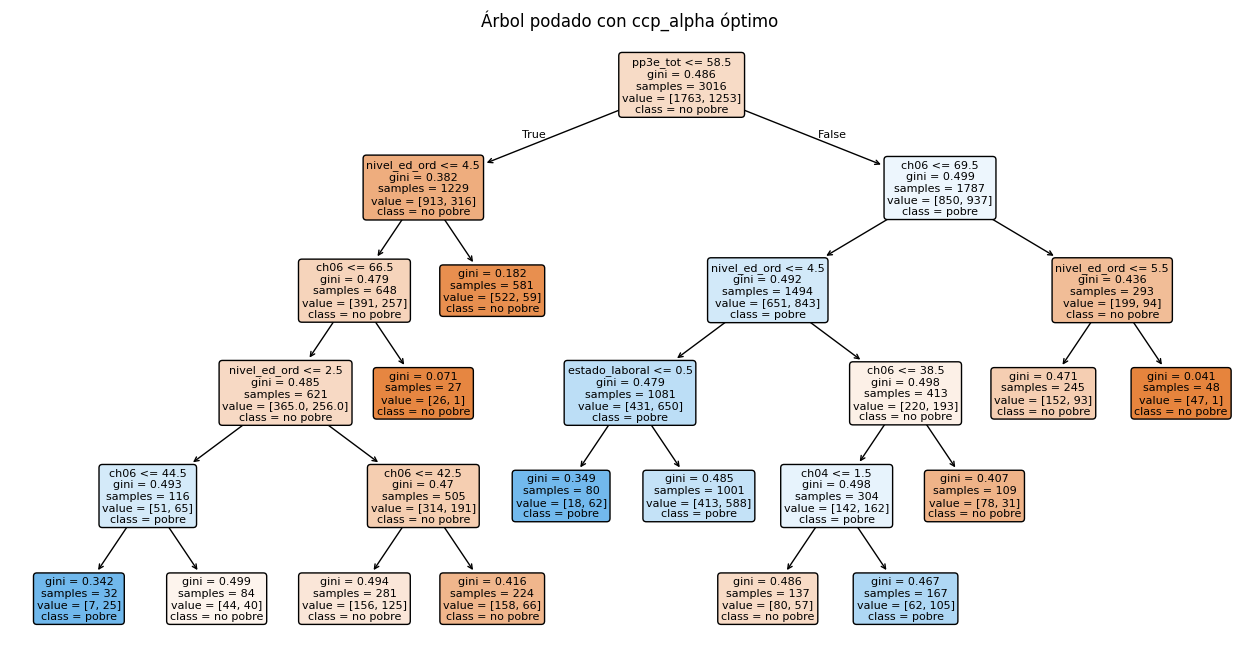

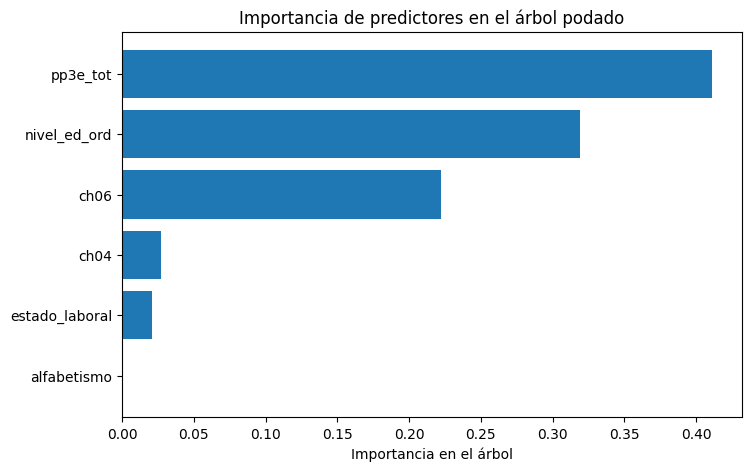


=== Importancias de variables ===


,variable,importancia
5,pp3e_tot,0.411317
2,nivel_ed_ord,0.319003
1,ch06,0.222131
0,ch04,0.026929
3,estado_laboral,0.020620
4,alfabetismo,0.000000


In [ ]:
# ============================
# EJERCICIO 5 — Árbol podado
# ============================

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1) Entrenamos el árbol podado con el alpha óptimo
tree_pruned = DecisionTreeClassifier(
    random_state=444,
    ccp_alpha=best_alpha,    # viene del punto 4
    min_samples_leaf=5,
    min_samples_split=20
)

tree_pruned.fit(X_train_ml, y_train_ml)

# ============================
# PANEL A — Gráfico del árbol
# ============================

plt.figure(figsize=(16, 8))
plot_tree(tree_pruned,
          feature_names=X_train_ml.columns,
          class_names=["no pobre", "pobre"],
          filled=True,
          rounded=True,
          fontsize=8)
plt.title("Árbol podado con ccp_alpha óptimo")
plt.show()


# ============================
# PANEL B — Importancia de variables
# ============================

importances = tree_pruned.feature_importances_
imp_df = pd.DataFrame({
    "variable": X_train_ml.columns,
    "importancia": importances
}).sort_values(by="importancia", ascending=False)

plt.figure(figsize=(8,5))
plt.barh(imp_df["variable"], imp_df["importancia"])
plt.gca().invert_yaxis()
plt.xlabel("Importancia en el árbol")
plt.title("Importancia de predictores en el árbol podado")
plt.show()

print("\n=== Importancias de variables ===")
display(imp_df)


In [ ]:
#6
# recuperar bases de 2025 tal como quedaron en el TP3

X_train, y_train = bases_train[2025]
X_test,  y_test  = bases_test[2025]

print("Shapes:")
print("X_train:", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train:", y_train.shape)
print("y_test: ", y_test.shape)

x_vars = ["ch04", "ch06", "nivel_ed_ord", "estado_laboral", "alfabetismo", "pp3e_tot"]

X_train_ml = X_train[x_vars].copy()
X_test_ml  = X_test[x_vars].copy()

y_train_ml = y_train.copy()
y_test_ml  = y_test.copy()



Shapes:
X_train: (1346, 7)
X_test:  (577, 7)
y_train: (1346,)
y_test:  (577,)


Shapes limpias:
X_train_ml: (1346, 6)   X_test_ml: (577, 6)

=== Logit sin penalidad ===
Matriz de confusión (p > 0.5):
[[395  26]
 [116  40]]
Accuracy : 0.754
Recall   : 0.256
Precision: 0.606
AUC      : 0.755

=== KNN (K=21) ===
Matriz de confusión (p > 0.5):
[[382  39]
 [105  51]]
Accuracy : 0.750
Recall   : 0.327
Precision: 0.567
AUC      : 0.749

=== Logit LASSO ===
Matriz de confusión (p > 0.5):
[[402  19]
 [130  26]]
Accuracy : 0.742
Recall   : 0.167
Precision: 0.578
AUC      : 0.756

=== Logit Ridge ===
Matriz de confusión (p > 0.5):
[[395  26]
 [116  40]]
Accuracy : 0.754
Recall   : 0.256
Precision: 0.606
AUC      : 0.755

=== Árbol podado (CART) ===
Matriz de confusión (p > 0.5):
[[391  30]
 [129  27]]
Accuracy : 0.724
Recall   : 0.173
Precision: 0.474
AUC      : 0.720

=== Resumen de métricas en TEST (2025) ===
                     accuracy  1-accuracy    recall  precision       auc
modelo                                                                  
Logit sin penalidad 

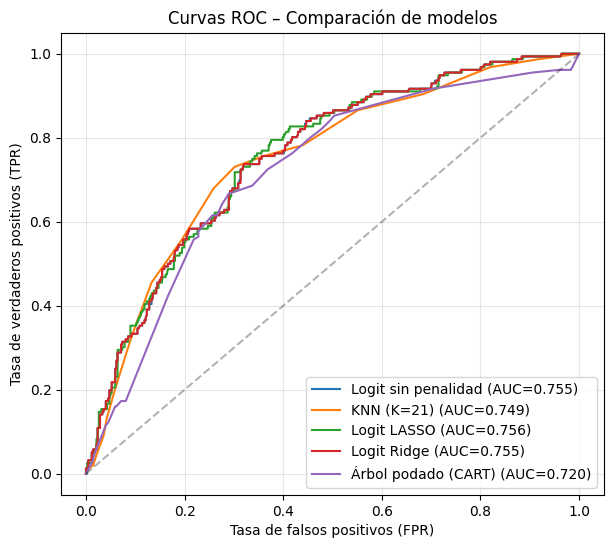

In [ ]:
# ======================================================
# CONSIGNA 6 – MATRIZ DE CONFUSIÓN, ROC Y MÉTRICAS
# ======================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc,
    accuracy_score, recall_score, precision_score
)

# ------------------------------------------------------
# 0) recuperar bases 2025 EXACTAMENTE como en el TP3
# ------------------------------------------------------
X_train, y_train = bases_train[2025]
X_test,  y_test  = bases_test[2025]

# mismas variables que en el TP3/TP4
x_vars = ["ch04", "ch06", "nivel_ed_ord", "estado_laboral", "alfabetismo", "pp3e_tot"]

X_train_ml = X_train[x_vars].copy()
X_test_ml  = X_test[x_vars].copy()
y_train_ml = y_train.copy()
y_test_ml  = y_test.copy()

# limpiamos filas con NaN (por las dudas)
mask_tr = X_train_ml.notna().all(axis=1)
X_train_ml = X_train_ml.loc[mask_tr]
y_train_ml = y_train_ml.loc[mask_tr].astype(int)

mask_te = X_test_ml.notna().all(axis=1)
X_test_ml = X_test_ml.loc[mask_te]
y_test_ml = y_test_ml.loc[mask_te].astype(int)

print("Shapes limpias:")
print("X_train_ml:", X_train_ml.shape, "  X_test_ml:", X_test_ml.shape)

# ------------------------------------------------------
# helper para métricas + ROC
# ------------------------------------------------------
def evaluar_modelo(model, X_te, y_te, nombre=""):
    y_pred = model.predict(X_te)
    y_prob = model.predict_proba(X_te)[:, 1]

    acc  = accuracy_score(y_te, y_pred)
    rec  = recall_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred)
    fpr, tpr, _ = roc_curve(y_te, y_prob)
    aucv = auc(fpr, tpr)

    print(f"\n=== {nombre} ===")
    print("Matriz de confusión (p > 0.5):")
    print(confusion_matrix(y_te, y_pred))
    print(f"Accuracy : {acc:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"AUC      : {aucv:.3f}")

    return {
        "modelo": nombre,
        "fpr": fpr,
        "tpr": tpr,
        "auc": aucv,
        "accuracy": acc,
        "1-accuracy": 1-acc,
        "recall": rec,
        "precision": prec
    }

resultados = []

# ------------------------------------------------------
# 1) LOGIT sin penalidad
# ------------------------------------------------------
logit_none = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        penalty=None,
        solver="lbfgs",
        max_iter=3000
    ))
])
logit_none.fit(X_train_ml, y_train_ml)
res_logit = evaluar_modelo(logit_none, X_test_ml, y_test_ml,
                           "Logit sin penalidad")
resultados.append(res_logit)

# ------------------------------------------------------
# 2) KNN con K óptimo del TP3 (cambiar si tu K fue otro)
# ------------------------------------------------------
best_k = 21   # si en tu TP3 el K óptimo fue otro, cambiá este número

knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=best_k))
])
knn.fit(X_train_ml, y_train_ml)
res_knn = evaluar_modelo(knn, X_test_ml, y_test_ml,
                         f"KNN (K={best_k})")
resultados.append(res_knn)

# ------------------------------------------------------
# 3) LOGIT LASSO (L1) con λ^cv (C óptimo del punto 2)
# ------------------------------------------------------
lasso_final = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        penalty="l1",
        C=lasso_best_C,    # viene de la consigna 2
        solver="saga",
        max_iter=3000
    ))
])
lasso_final.fit(X_train_ml, y_train_ml)
res_lasso = evaluar_modelo(lasso_final, X_test_ml, y_test_ml,
                           "Logit LASSO")
resultados.append(res_lasso)

# ------------------------------------------------------
# 4) LOGIT RIDGE (L2) con λ^cv
# ------------------------------------------------------
ridge_final = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        penalty="l2",
        C=ridge_best_C,    # viene de la consigna 2
        solver="lbfgs",
        max_iter=3000
    ))
])
ridge_final.fit(X_train_ml, y_train_ml)
res_ridge = evaluar_modelo(ridge_final, X_test_ml, y_test_ml,
                           "Logit Ridge")
resultados.append(res_ridge)

# ------------------------------------------------------
# 5) ÁRBOL podado (CART) con ccp_alpha óptimo
# ------------------------------------------------------
cart = DecisionTreeClassifier(
    random_state=444,
    ccp_alpha=best_alpha   # viene del punto 4 (CART)
)
cart.fit(X_train_ml, y_train_ml)
res_cart = evaluar_modelo(cart, X_test_ml, y_test_ml,
                          "Árbol podado (CART)")
resultados.append(res_cart)

# ------------------------------------------------------
# 6) DATAFRAME RESUMEN DE MÉTRICAS
# ------------------------------------------------------
res_df = (pd.DataFrame(resultados)
            .set_index("modelo")
            [["accuracy", "1-accuracy", "recall", "precision", "auc"]])

print("\n=== Resumen de métricas en TEST (2025) ===")
print(res_df)

# ------------------------------------------------------
# 7) CURVA ROC COMPARADA
# ------------------------------------------------------
plt.figure(figsize=(7,6))
for r in resultados:
    plt.plot(r["fpr"], r["tpr"], label=f"{r['modelo']} (AUC={r['auc']:.3f})")

plt.plot([0,1],[0,1],"k--",alpha=0.3)
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title("Curvas ROC – Comparación de modelos")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


=== Comparación de modelos en test 2025 ===


,Modelo,Accuracy,1 - Accuracy,Precision,Recall,AUC
0,Logit LASSO,0.742,0.258,0.578,0.167,0.756
1,Logit Ridge,0.731,0.269,0.526,0.064,0.756
2,Logit sin penalidad,0.754,0.246,0.606,0.256,0.755
3,KNN (K=21),0.750,0.250,0.567,0.327,0.749
4,Árbol podado (α=0.0069),0.730,0.270,0.000,0.000,0.695


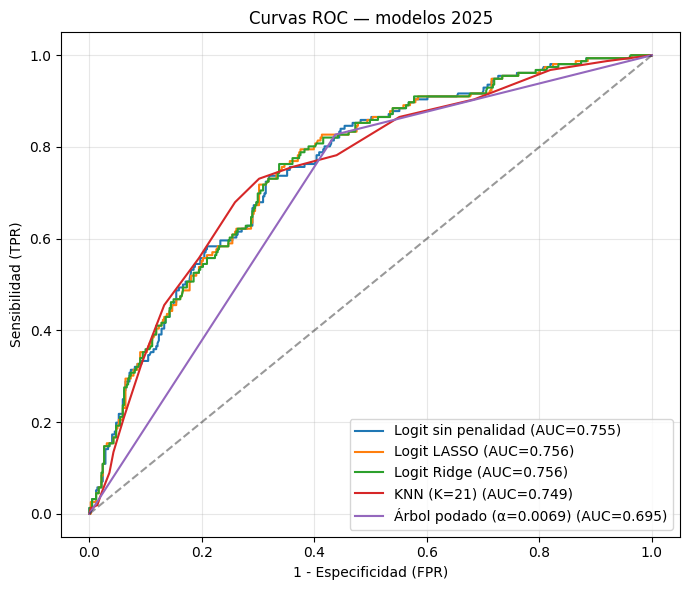

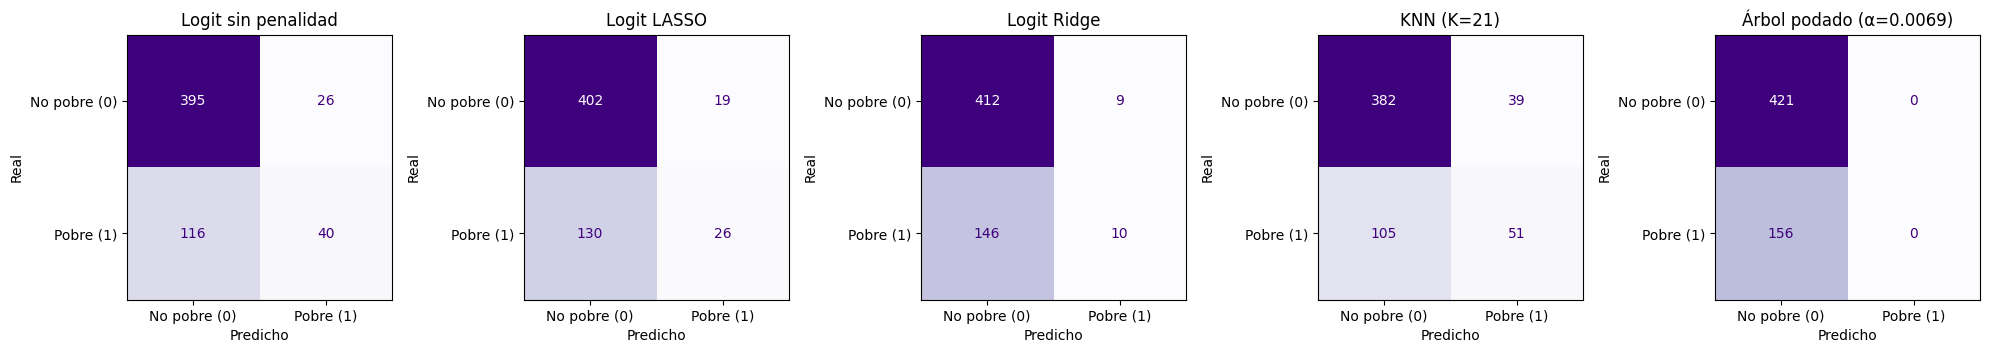

In [ ]:
#CREO Q VA EL DE ARRIBA. ESTE NO LO ESCRIBAS
# === C.6 Comparación entre métodos (versión completa) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score,
    accuracy_score, precision_score, recall_score
)

# ---------------------------------------------------------
# 0) Tomamos las bases 2025 que ya tenías del TP3
# ---------------------------------------------------------
Xtr_25, ytr_25 = bases_train[2025]
Xte_25, yte_25 = bases_test[2025]

# pasamos a numérico y sacamos NaN
def prep_X(X, drop_intercept=True):
    Xn = X.copy()
    if drop_intercept:
        Xn = Xn.drop(columns=["intercept"], errors="ignore")
    for c in Xn.columns:
        Xn[c] = pd.to_numeric(Xn[c], errors="coerce")
    return Xn.fillna(0)

X_train = prep_X(Xtr_25, drop_intercept=True)
X_test  = prep_X(Xte_25, drop_intercept=True)
y_train = ytr_25.astype(int)
y_test  = yte_25.astype(int)

# ---------------------------------------------------------
# 1) Definimos/entrenamos los modelos
# ---------------------------------------------------------

# hiperparámetros que ya habías encontrado
C_lasso = 0.1   # λ = 10^1  → C = 0.1
C_ridge = 0.01  # λ = 10^2  → C = 0.01
k_opt   = 21    # el que te había dado en el punto 7
try:
    best_alpha
except NameError:
    best_alpha = 0.0069  # el que te salió en el gráfico

# (a) Logit sin penalidad
logit_simple = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(penalty=None, max_iter=3000, random_state=444))
])
logit_simple.fit(X_train, y_train)

# (b) Logit L1 (LASSO)
logit_lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(penalty="l1", C=C_lasso,
                                  solver="saga", max_iter=3000, random_state=444))
])
logit_lasso.fit(X_train, y_train)

# (c) Logit L2 (Ridge)
logit_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(penalty="l2", C=C_ridge,
                                  solver="lbfgs", max_iter=3000, random_state=444))
])
logit_ridge.fit(X_train, y_train)

# (d) KNN con K óptimo
knn_kcv = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=k_opt))
])
knn_kcv.fit(X_train, y_train)

# (e) Árbol de decisión podado
tree_final = DecisionTreeClassifier(
    random_state=444,
    ccp_alpha=best_alpha,
    min_samples_split=5
)
tree_final.fit(X_train, y_train)

# ---------------------------------------------------------
# 2) Predicciones y probabilidades en TEST
# ---------------------------------------------------------
modelos = {
    "Logit sin penalidad": logit_simple,
    "Logit LASSO": logit_lasso,
    "Logit Ridge": logit_ridge,
    f"KNN (K={k_opt})": knn_kcv,
    f"Árbol podado (α={best_alpha:.4f})": tree_final
}

preds = {}
for nombre, model in modelos.items():
    # algunos tienen predict_proba, todos tienen predict
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_test)[:, 1]
    else:
        # por seguridad, si no tiene predict_proba (no debería pasar), armamos una seudo proba
        y_hat = model.predict(X_test)
        proba = y_hat.astype(float)

    y_hat = (proba > 0.5).astype(int)
    preds[nombre] = (proba, y_hat)

# ---------------------------------------------------------
# 3) Métricas en una tabla
# ---------------------------------------------------------
rows = []
for nombre, (p, yhat) in preds.items():
    acc  = accuracy_score(y_test, yhat)
    prec = precision_score(y_test, yhat, zero_division=0)
    rec  = recall_score(y_test, yhat, zero_division=0)
    auc  = roc_auc_score(y_test, p)
    rows.append({
        "Modelo": nombre,
        "Accuracy": acc,
        "1 - Accuracy": 1 - acc,
        "Precision": prec,
        "Recall": rec,
        "AUC": auc
    })

df_metrics = pd.DataFrame(rows).sort_values("AUC", ascending=False).reset_index(drop=True)
print("=== Comparación de modelos en test 2025 ===")
display(df_metrics.round(3))

# ---------------------------------------------------------
# 4) Curvas ROC
# ---------------------------------------------------------
plt.figure(figsize=(7,6))
for nombre, (p, _) in preds.items():
    fpr, tpr, _ = roc_curve(y_test, p)
    auc = roc_auc_score(y_test, p)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC={auc:.3f})")
plt.plot([0,1],[0,1],"k--",alpha=0.4)
plt.xlabel("1 - Especificidad (FPR)")
plt.ylabel("Sensibilidad (TPR)")
plt.title("Curvas ROC — modelos 2025")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 5) Matrices de confusión (todas)
# ---------------------------------------------------------
n_models = len(preds)
fig, axes = plt.subplots(1, n_models, figsize=(4*n_models, 4))
if n_models == 1:
    axes = [axes]

for ax, (nombre, (p, yhat)) in zip(axes, preds.items()):
    cm = confusion_matrix(y_test, yhat)
    disp = ConfusionMatrixDisplay(cm, display_labels=["No pobre (0)", "Pobre (1)"])
    disp.plot(ax=ax, cmap="Purples", colorbar=False, values_format="d")
    ax.set_title(nombre)
    ax.set_xlabel("Predicho")
    ax.set_ylabel("Real")
    ax.grid(False)

plt.tight_layout()
plt.show()
